<a href="https://www.kaggle.com/code/zhukovoleksiy/superstore-dataset-complete-analysis-plotly?scriptVersionId=124984598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

[[](http://)](http://)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS</div>

* &nbsp; **[Used Libraries](#USED-LIBRARIES)**

* &nbsp; **[Metadata](#METADATA)**

* &nbsp; **[Load and Check Data](#LOAD-AND-CHECK-DATA)**

* &nbsp; **[Data Cleaning](#DATA-CLEANING)**

* &nbsp; **[Understanding the Shape of Data](#UNDERSTANDING-THE-SHAPE-OF-DATA)**
    * &nbsp; [State](#State)
    * &nbsp; [Ship Mode](#Ship-Mode)
    * &nbsp; [Segment](#Segment)
    * &nbsp; [Region](#Region)
    * &nbsp; [Category](#Category)
    * &nbsp; [Sub-Category](#Sub-Category)
    

* &nbsp; **[Geo Analysis](#GEO-ANALYSIS)**

    * &nbsp; [Sales & Profit](#Sales-&-Profit)
    * &nbsp; [Category Columns](#Category-Columns-(Ship-Mode,-Segment,-Category,-Sub-Category))
    

* &nbsp; **[Product Analysis](#PRODUCT-ANALYSIS)**

    * &nbsp; [Total Sales](#Total-Sales)
    * &nbsp; [Median Sales](#Median-Sales)
    * &nbsp; [Mean Sales](#Mean-Sales)
    * &nbsp; [Sales Boxplot](#Sales-Boxplot)
    * &nbsp; [Total Profit](#Total-Profit)
    * &nbsp; [Median Profit](#Median-Profit)
    * &nbsp; [Mean Profit](#Mean-Profit)
    * &nbsp; [Profit Boxplot](#Profit-Boxplot)
    * &nbsp; [Total Quantity](#Total-Quantity)
    * &nbsp; [Median Quantity](#Median-Quantity)
    * &nbsp; [Mean Quantity](#Mean-Quantity)
    * &nbsp; [Quantity Boxplot](#Quantity-Boxplot)
    * &nbsp; [Quantity & Profit Correlation](#Quantity-&-Profit-Correlation)
    * &nbsp; [Profit Margin](#Profit-Margin)
    

* &nbsp; **[Customer Analysis](#CUSTOMER-ANALYSIS)**

    * &nbsp; [Total Sales](#Total--Sales)
    * &nbsp; [Median Sales](#Median--Sales)
    * &nbsp; [Mean Sales](#Mean--Sales)
    * &nbsp; [Total Profit](#Total--Profit)
    * &nbsp; [Median Profit](#Median--Profit)
    * &nbsp; [Mean Profit](#Mean--Profit)
    * &nbsp; [Total Quantity](#Total--Quantity)
    * &nbsp; [Median Quantity](#Median--Quantity)
    * &nbsp; [Mean Quantity](#Mean--Quantity)
    * &nbsp; [Profit Margin](#Profit--Margin)
    * &nbsp; [Regular Customers](#Regular-Customers)
    

* &nbsp; **[Time Series Analysis](#TIME-SERIES-ANALYSIS)**

    * &nbsp; [Sales](#Sales)
    * &nbsp; [Profit](#Profit)
    * &nbsp; [Sales & Profit](#Sales-&--Profit)
    * &nbsp; [Order Date and Ship Date](#Order-Date-and-Ship-Date)


* &nbsp; **[Discount](#DISCOUNT)**

    * &nbsp; [Total Sales](#Total---Sales)
    * &nbsp; [Mean Sales](#Mean---Sales)
    * &nbsp; [Total Profit](#Total---Profit)
    * &nbsp; [Mean Profit](#Mean---Profit)
    * &nbsp; [Profit Margin](#Profit---Margin)
    * &nbsp; [Category Columns & Discount](#Category-Columns-&-Discount)
    * &nbsp; [Geo Columns & Discount](#Geo-Columns-&-Discount)


* &nbsp; **[Conclusion](#CONCLUSION)**

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">USED LIBRARIES</div>


*  **Numpy** (link: [numpy.org](https://numpy.org/))
*  **Pandas** (link: [pandas.pydata.org](https://pandas.pydata.org/))
*  **Plotly** (link: [plotly.com](https://plotly.com/))
*  **Seaborn** (link: [seaborn.pydata.org](https://seaborn.pydata.org/))
*  **MatplotLib** (link: [matplotlib.org](https://matplotlib.org/))

In [1]:
# Install Kaleido package to transform plotly charts to svg and png format, so they are visible on GitHub
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [2]:
# Linear Algebra
import numpy as np

# Data Processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# Data Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">METADATA</div>

(From [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) Data Card)

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD AND CHECK DATA</div>

In [3]:
data = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', index_col = 'Row ID', encoding='cp1252')
data.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [5]:
def check_columns(data):
    """
    print number of unique values for each column in [data] 
    """
        
    for column in data.columns:
        print("Column Name:", column+";", "Number of Unique Values:", len(data[column].unique()))
        
check_columns(data)

Column Name: Order ID; Number of Unique Values: 5009
Column Name: Order Date; Number of Unique Values: 1237
Column Name: Ship Date; Number of Unique Values: 1334
Column Name: Ship Mode; Number of Unique Values: 4
Column Name: Customer ID; Number of Unique Values: 793
Column Name: Customer Name; Number of Unique Values: 793
Column Name: Segment; Number of Unique Values: 3
Column Name: Country; Number of Unique Values: 1
Column Name: City; Number of Unique Values: 531
Column Name: State; Number of Unique Values: 49
Column Name: Postal Code; Number of Unique Values: 631
Column Name: Region; Number of Unique Values: 4
Column Name: Product ID; Number of Unique Values: 1862
Column Name: Category; Number of Unique Values: 3
Column Name: Sub-Category; Number of Unique Values: 17
Column Name: Product Name; Number of Unique Values: 1850
Column Name: Sales; Number of Unique Values: 5825
Column Name: Quantity; Number of Unique Values: 14
Column Name: Discount; Number of Unique Values: 12
Column Na

## Inference:

* **Data is quite clear, no null values found.**
* **There are 2 int64 columns ("Quantity" and "Postal Code")**
* **There are 3 float64 columns ("Sales", "Discount", "Profit")**
* **There are 15 object columns.**
* **We need to reconsider whether we need such columns as:**
    * **Country - There is only one unique value.**
    * **Customer Name - We have column "Customer ID", therefore there is no need for this column.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA CLEANING</div>

#### Drop duplicated data

In [6]:
data.loc[data.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [7]:
# drop unnecessary columns
data = data.drop(columns=["Country", "Customer Name"])

# drop duplicated data
data = data.drop_duplicates()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">UNDERSTANDING THE SHAPE OF DATA</div>

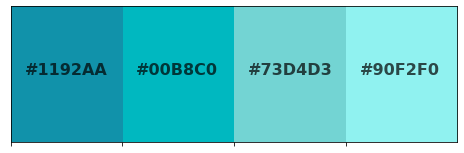

In [8]:
# creating a custom palette
colors = ['#1192AA','#00B8C0', '#73D4D3', '#90F2F0']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha =0.7)
plt.gcf().set_facecolor('white')

plt.show()

## State

In [9]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

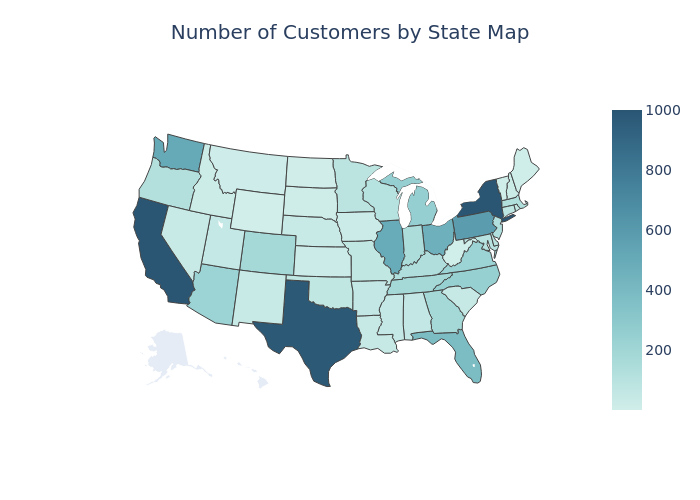

In [10]:
import plotly.graph_objects as go

# Create new column with State Abbreviations
data['State_abb'] = data['State'].replace(us_state_to_abbrev)

# Plot
fig = go.Figure(data=go.Choropleth(
    locations= data['State_abb'].value_counts().index, # Spatial coordinates
    z = data['State_abb'].value_counts(), # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show("png") # for GitHub version

## Ship Mode

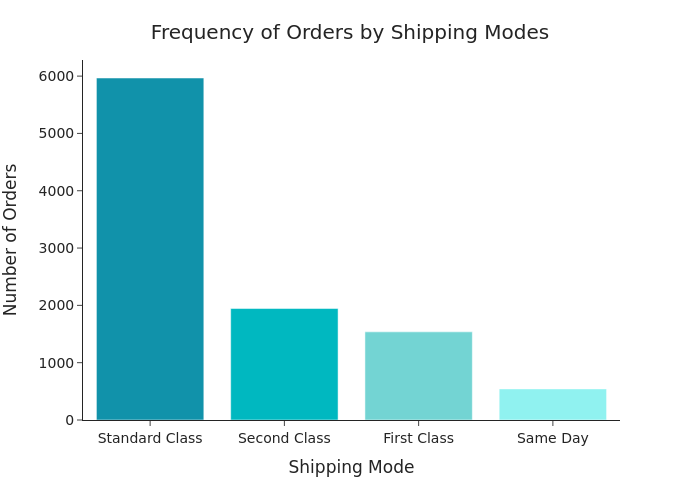

In [11]:
fig = px.bar(x = data['Ship Mode'].value_counts().index, y = data['Ship Mode'].value_counts(),
             color = data['Ship Mode'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Shipping Modes",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Segment

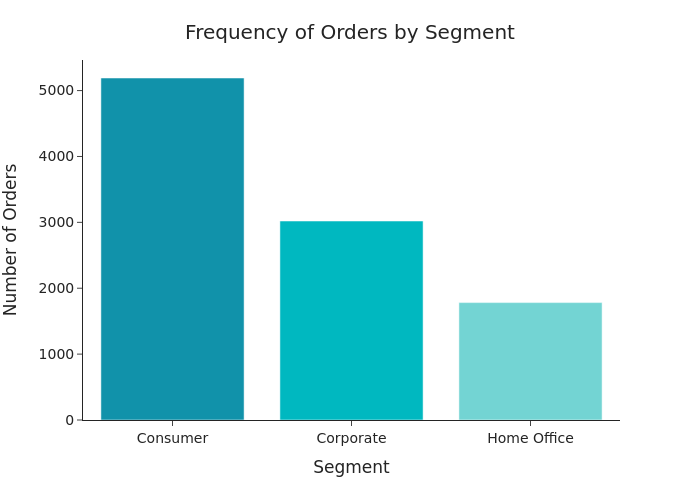

In [12]:
fig = px.bar(x = data['Segment'].value_counts().index, y = data['Segment'].value_counts(),
             color = data['Segment'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Region

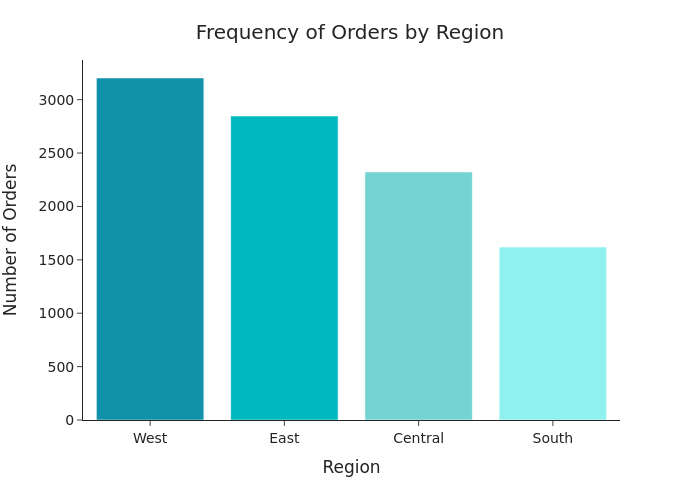

In [13]:
fig = px.bar(x = data['Region'].value_counts().index, y = data['Region'].value_counts(),
             color = data['Region'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Region",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Category

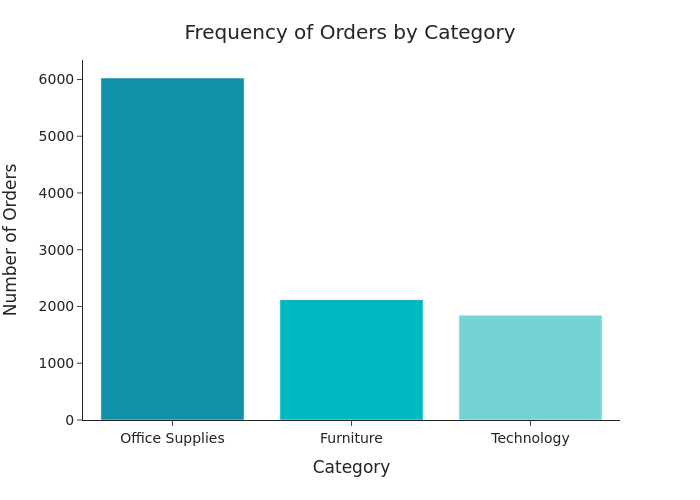

In [14]:
fig = px.bar(x = data['Category'].value_counts().index, y = data['Category'].value_counts(),
             color = data['Category'].value_counts().index,
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Sub-Category

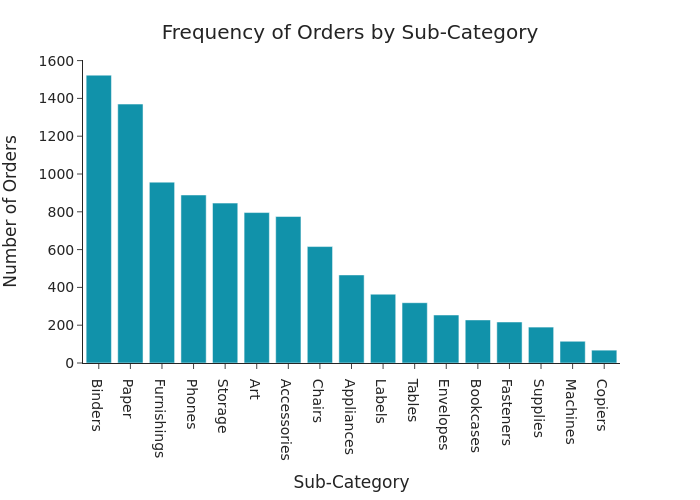

In [15]:
fig = px.bar(x = data['Sub-Category'].value_counts().index, y = data['Sub-Category'].value_counts(),
             template = 'simple_white', color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Inference:
* **Three most popular states among the customers are California, New York and Texas.**
* **Majority of the customers prefer the Standard Class Shipping mode.**
* **Most of the customers are from Consumer Segment.**
* **Least of all orders from the southern region.**
* **Office Supplies take up most of the sales.**
* **Blinders and Paper are clear leaders in sales among customers.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">GEO ANALYSIS</div>

## Sales & Profit

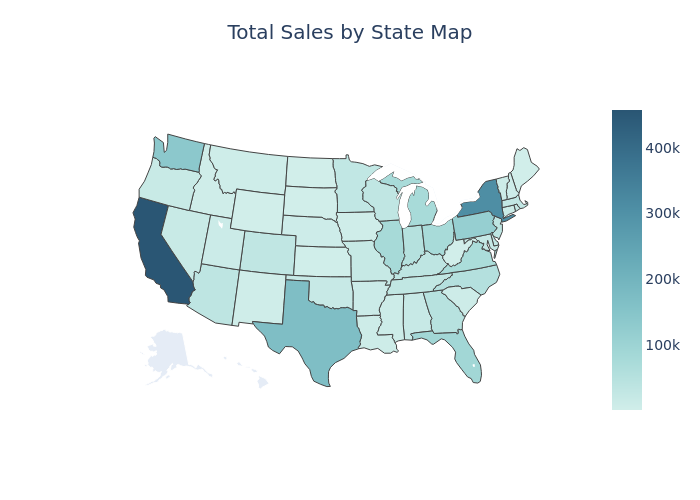

In [16]:
# Create a new table for below analysis

# Make a copy of original table
data_copy = data.copy()

# Group by State_abb and aggrigate sum function on Sales and Profit columns
data_sum_by_states = data_copy[['State_abb', 'Sales', 'Profit']].groupby('State_abb').sum()

# Reset index
data_sum_by_states.reset_index(inplace=True)

# Plotr
fig = go.Figure(data=go.Choropleth(
    locations= data_sum_by_states['State_abb'], # Spatial coordinates
    z = data_sum_by_states['Sales'], # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'teal',
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show("png") # for GitHub version

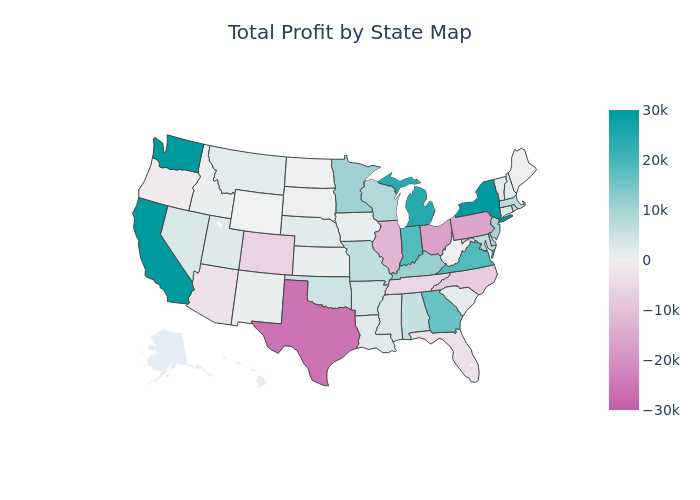

In [17]:
fig = go.Figure(data=go.Choropleth(
    locations= data_sum_by_states['State_abb'], # Spatial coordinates
    z = data_sum_by_states['Profit'], # Data to be color-coded
    locationmode = 'USA-states',
    colorscale = 'tropic_r', zmin = -30000, zmax = 30000
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa', # limite map scope to USA
)

fig.show("png") # for GitHub version

## Category Columns (Ship Mode, Segment, Category, Sub-Category)

In [18]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for ship_mode in data1['Ship Mode'].unique():
    data1[ship_mode] = data1.loc[data1['Ship Mode'] == ship_mode]['Ship Mode']

# Group by State_abb and count
data1 = data1[['State_abb', 'Second Class', 'Standard Class', 'First Class', 'Same Day']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Second Class,Standard Class,First Class,Same Day
0,AL,18,33,9,1
1,AR,10,38,10,2
2,AZ,27,139,42,16


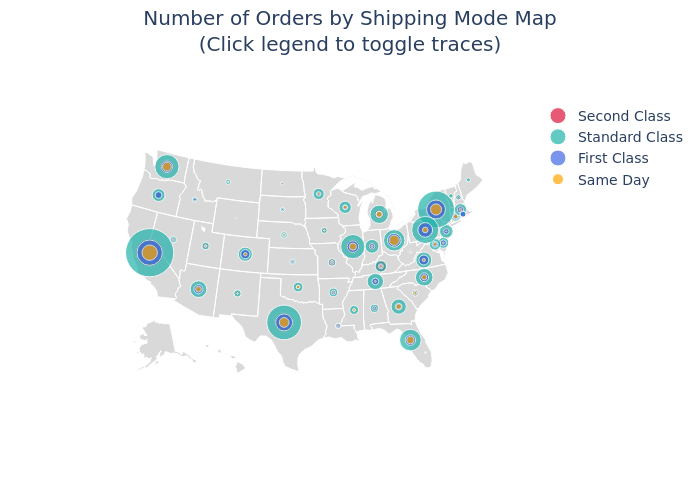

In [19]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ["Second Class", "Standard Class", "First Class", "Same Day"]

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Shipping Mode Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show("png") # for GitHub version

****

In [20]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for segment in data1['Segment'].unique():
    data1[segment] = data1.loc[data1['Segment'] == segment]['Segment']

# Group by State_abb and count
data1 = data1[['State_abb', 'Consumer', 'Corporate', 'Home Office']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Consumer,Corporate,Home Office
0,AL,25,28,8
1,AR,37,14,9
2,AZ,110,69,45


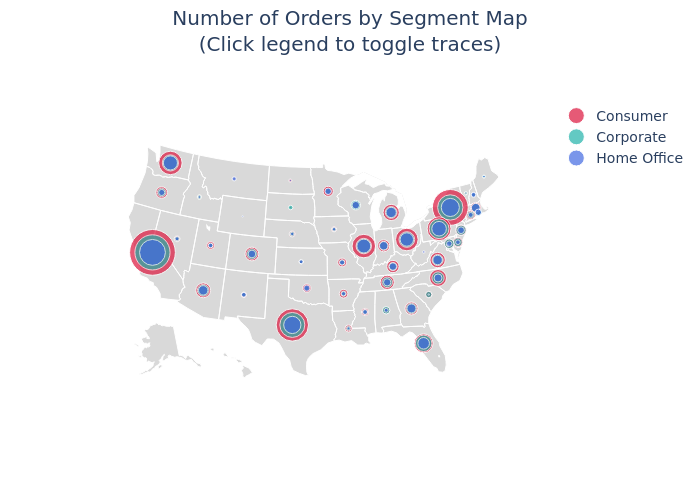

In [21]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Consumer', 'Corporate', 'Home Office']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Segment Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show("png") # for GitHub version

****

In [22]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for category in data1['Category'].unique():
    data1[category] = data1.loc[data1['Category'] == category]['Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Furniture', 'Office Supplies', 'Technology']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Furniture,Office Supplies,Technology
0,AL,11,36,14
1,AR,9,36,15
2,AZ,49,127,48


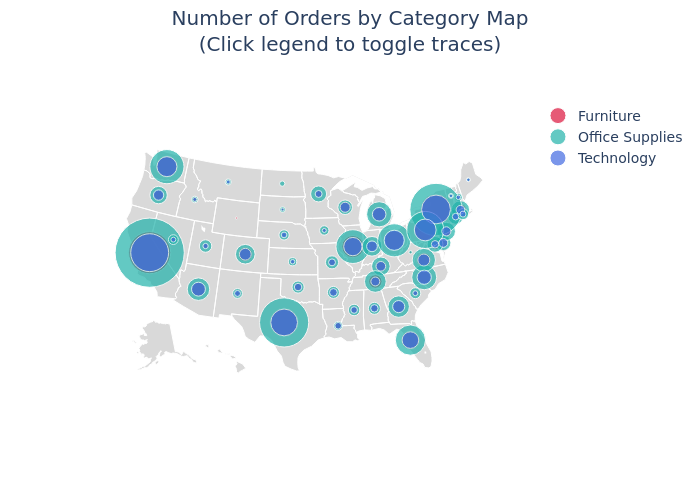

In [23]:
fig = go.Figure()

colors = ["crimson", "lightseagreen", "royalblue","orange","lightgrey"]
columns = ['Furniture', 'Office Supplies', 'Technology']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*2,
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show("png") # for GitHub version

****

In [24]:
# Create new data table for chart below

# Make a copy of original table
data1 = data.copy()

# Split Ship Mode values in unique columns
for category in data1['Sub-Category'].unique():
    data1[category] = data1.loc[data1['Sub-Category'] == category]['Sub-Category']

# Group by State_abb and count
data1 = data1[['State_abb', 'Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
data1.reset_index(inplace = True)
data1.head(3)

,State_abb,Bookcases,Chairs,Labels,Tables,Storage,Furnishings,Art,Phones,Binders,Appliances,Paper,Accessories,Envelopes,Fasteners,Supplies,Machines,Copiers
0,AL,0,5,2,3,3,3,7,6,10,1,8,6,2,1,2,1,1
1,AR,1,2,1,1,2,5,6,4,10,0,12,11,3,2,0,0,0
2,AZ,3,16,3,9,21,21,14,23,35,6,31,22,7,6,4,3,0


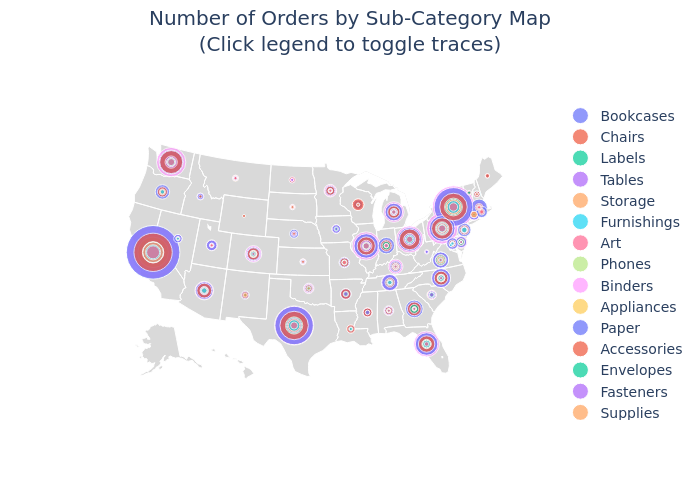

In [25]:
fig = go.Figure()

columns = ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = data1['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = data1[column]*5,
                 #color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Sub-Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show("png") # for GitHub version

****

## Inference:

* **California, New York, Texas, Washington and Pennsylvania are Top 5 States by Total Sales. At the same time, California and New York are leaders with a significant difference in sales compared to the rest of the states.**
* **Despite the fact that Texas is in the top 3 in terms of sales, the state suffers the largest loss in gross profit among all.**
* **Ohio, Pennsylvania and Illinois also bear big losses in profit.**
* **California, New York and Washington have the highest gross profit values of all states**
* **For the most part, the distribution of Shipping Modes by state is the same as in all data, no obvious deviations are observed.**
* **For the most part, the distribution of Customers Segments by state is the same as in all data. However, in some cases like in Wisconsin Consumer Semgent is not the most popular.**
* **For the most part, the distribution of Categories and Sub-Categories by state is the same as in all data, no obvious deviations are observed.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">PRODUCT ANALYSIS</div>

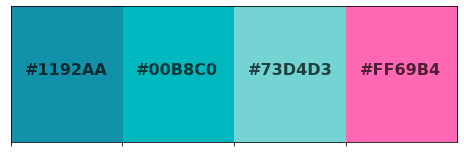

In [26]:
# creating a custom palette
colors = ['#1192AA','#00B8C0', '#73D4D3', '#FF69B4']

sns.palplot(colors)
plt.gcf().set_size_inches(8,2.5)

for idx,values in enumerate(colors):
    plt.text(idx-0.375,0, colors[idx],{'font': "Courier New", 'size':16, 'weight':'bold','color':'black'}, alpha =0.7)
plt.gcf().set_facecolor('white')

plt.show()

## Total Sales

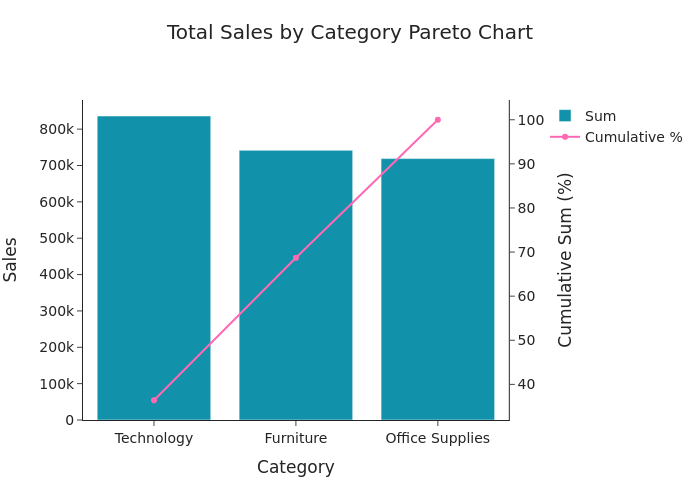

In [27]:
# import make_subplots function to create subplot
from plotly.subplots import make_subplots

## CREATE NEW TABLE
# group by category
sales_per_category = data[['Category', 'Sales']].groupby('Category').sum()

# sort values by Sales
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_category['cumperc'] = sales_per_category.cumsum()/sales_per_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_category.index,
           y = sales_per_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_category.index,
               y = sales_per_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show("png") # for GitHub version

In [28]:
## CREATE NEW TABLE
# group by sub-category
sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').sum()

# sort values by Sales
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_sub_category['cumperc'] = sales_per_sub_category.cumsum()/sales_per_sub_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_sub_category.index,
           y = sales_per_sub_category['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_sub_category.index,
               y = sales_per_sub_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Sub-Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show()

## Median Sales

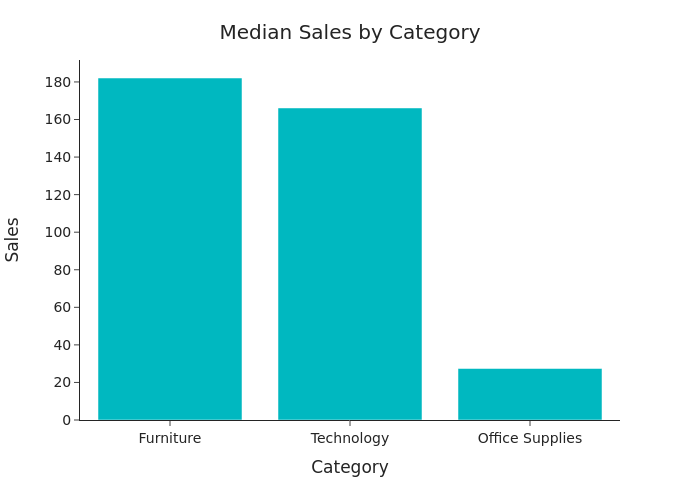

In [29]:
## CREATE NEW TABLE
# group by category
median_sales_per_category = data[['Category', 'Sales']].groupby('Category').median()

# sort values by Sales
median_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_category.index,
             y = median_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

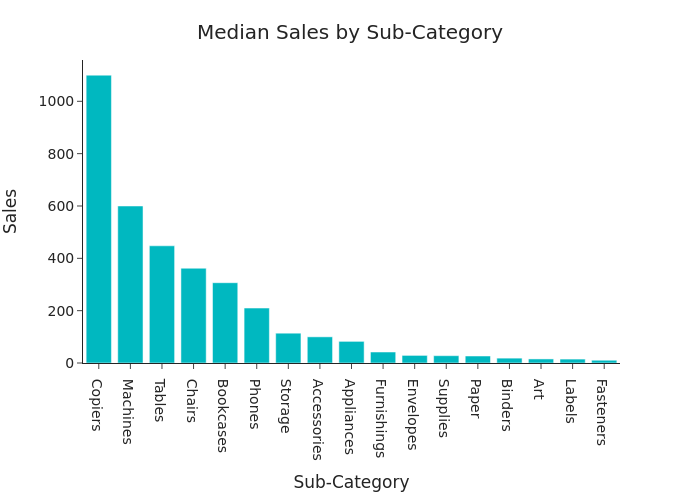

In [30]:
## CREATE NEW TABLE
# group by category
median_sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').median()

# sort values by Sales
median_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_sub_category.index,
             y = median_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean Sales

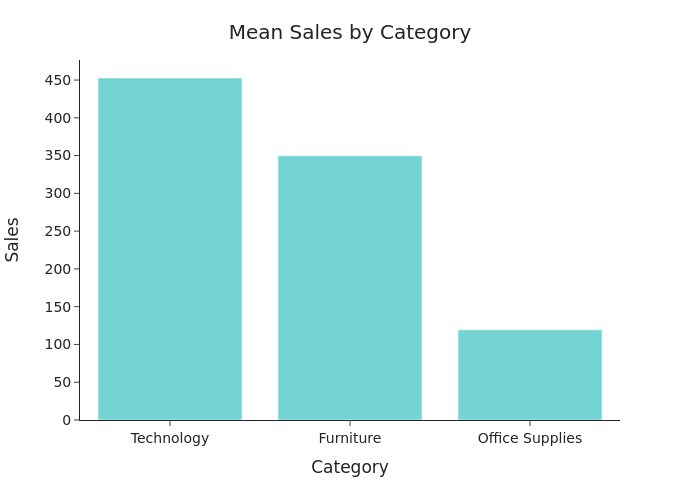

In [31]:
## CREATE NEW TABLE
# group by category
mean_sales_per_category = data[['Category', 'Sales']].groupby('Category').mean()

# sort values by Sales
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_category.index,
             y = mean_sales_per_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Sales by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

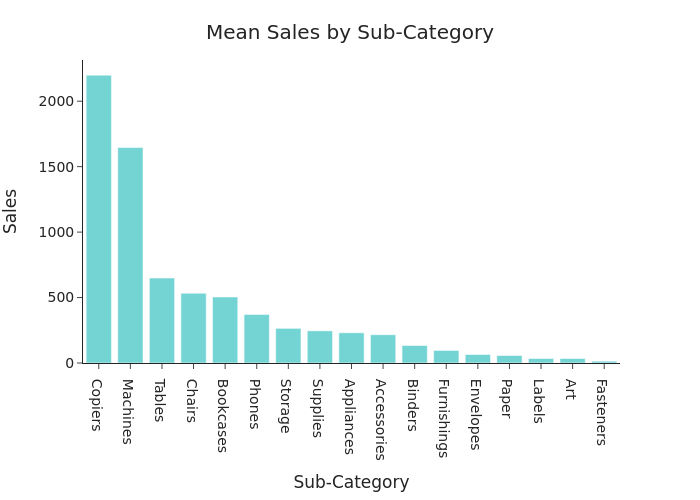

In [32]:
## CREATE NEW TABLE
# group by category
mean_sales_per_sub_category = data[['Sub-Category', 'Sales']].groupby('Sub-Category').mean()

# sort values by Sales
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_sub_category.index,
             y = mean_sales_per_sub_category['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Sales by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Sales Boxplot

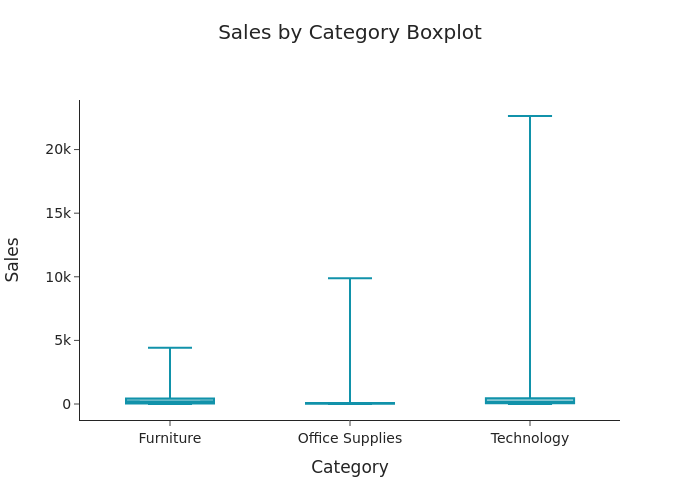

In [33]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Sales by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

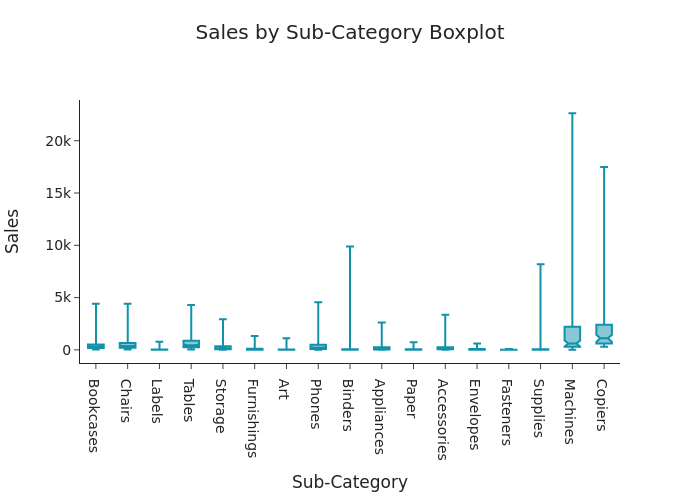

In [34]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Sales'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Sales by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:

* **Total Sales by Category fairly evenly distributed.**
* **Phones and Chairs make up almost 30% of all sales.**
* **Median Sales value in the Office Supplies category is much less than in other categories. This is most likely due to the fact that prices for products from other categories are much higher.**
* **Considering Medial Sales value Copiers, Machines, Tables, Chairs, Bookcases are leading Sub-Categories.**
* **Mean Sales value in the Office Supplies category is much less than in other categories.**
* **Considering Mean Sales value Copiers, Machines, Tables, Chairs, Bookcases are leading Sub-Categories.**
* **All Categories have a small difference between q3 and q1 values (q3 - q1)**
* **Technology Category has the highest range value**
* **All Sub-Categories, except Machines and Copiers have a small difference between q3 and q1 values (q3 - q1)**
* **Machines and Copiers have the highest range values compared to the other Sub-Categories**

****

## Total Profit

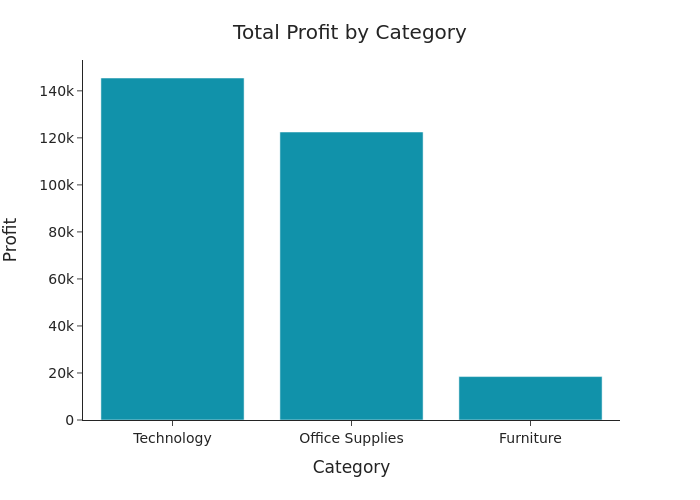

In [35]:
## CREATE NEW TABLE
# group by category
profit_per_category = data[['Category', 'Profit']].groupby('Category').sum()

# sort values by Sales
profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = profit_per_category.index,
             y = profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

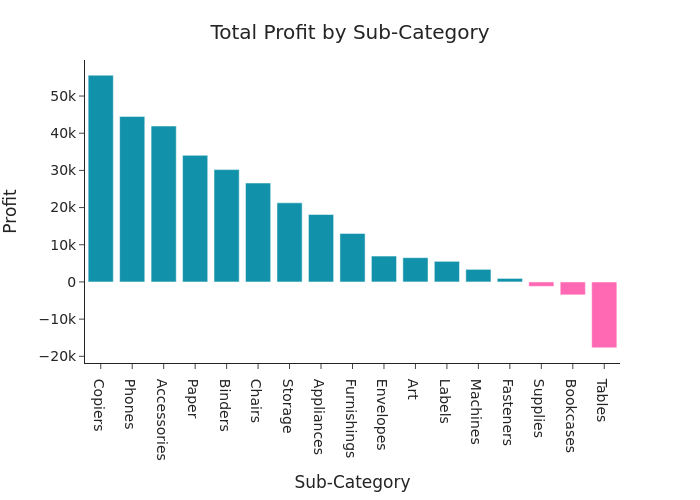

In [36]:
## CREATE NEW TABLE
# group by category
profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').sum()

# sort values by Sales
profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[0],] * 17
new_colors[14] = '#FF69B4' 
new_colors[15] = '#FF69B4'
new_colors[16] = '#FF69B4'

# bar chart
fig = px.bar(x = profit_per_sub_category.index,
             y = profit_per_sub_category['Profit'],
             color = profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Median Profit

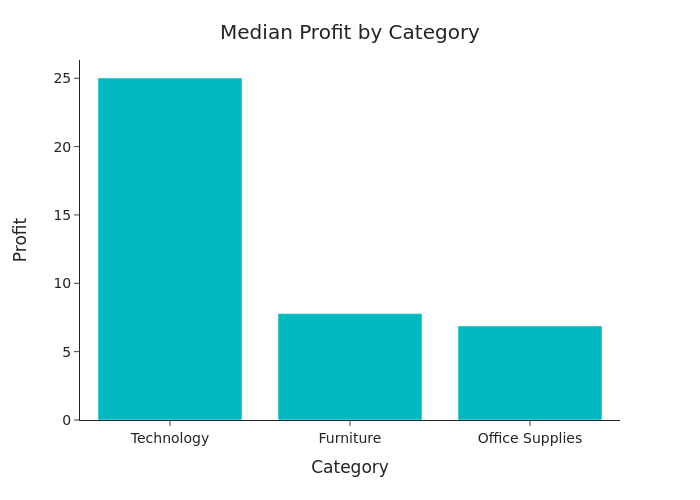

In [37]:
## CREATE NEW TABLE
# group by category
median_profit_per_category = data[['Category', 'Profit']].groupby('Category').median()

# sort values by Sales
median_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_profit_per_category.index,
             y = median_profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

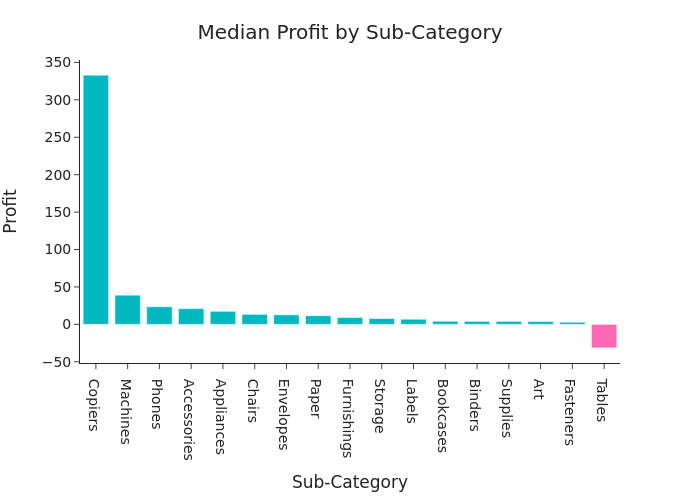

In [38]:
## CREATE NEW TABLE
# group by category
median_profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').median()

# sort values by Sales
median_profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[1],] * 17
new_colors[16] = '#FF69B4' 

# bar chart
fig = px.bar(x = median_profit_per_sub_category.index,
             y = median_profit_per_sub_category['Profit'],
             color = median_profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean Profit

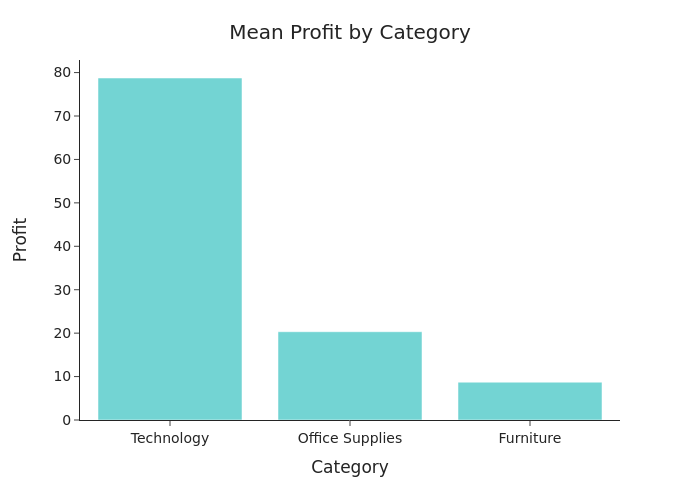

In [39]:
## CREATE NEW TABLE
# group by category
mean_profit_per_category = data[['Category', 'Profit']].groupby('Category').mean()

# sort values by Sales
mean_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_profit_per_category.index,
             y = mean_profit_per_category['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Profit by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

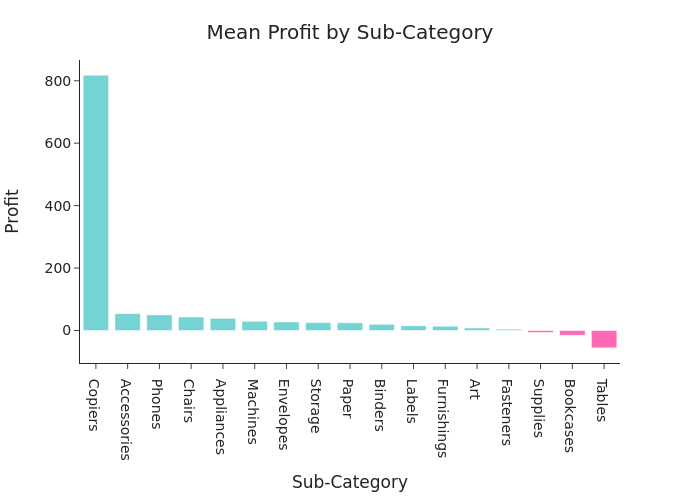

In [40]:
## CREATE NEW TABLE
# group by category
mean_profit_per_sub_category = data[['Sub-Category', 'Profit']].groupby('Sub-Category').mean()

# sort values by Sales
mean_profit_per_sub_category.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# customize colors
new_colors = [colors[2],] * 17
new_colors[15] = '#FF69B4'
new_colors[14] = '#FF69B4'
new_colors[16] = '#FF69B4' 

# bar chart
fig = px.bar(x = mean_profit_per_sub_category.index,
             y = mean_profit_per_sub_category['Profit'],
             color = mean_profit_per_sub_category.index,
             template = 'simple_white', color_discrete_sequence = new_colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Profit by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Profit Boxplot

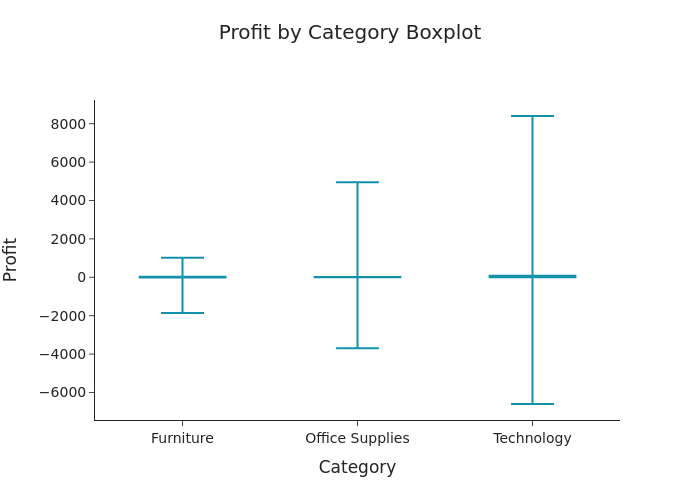

In [41]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)
    
fig.show("png") # for GitHub version

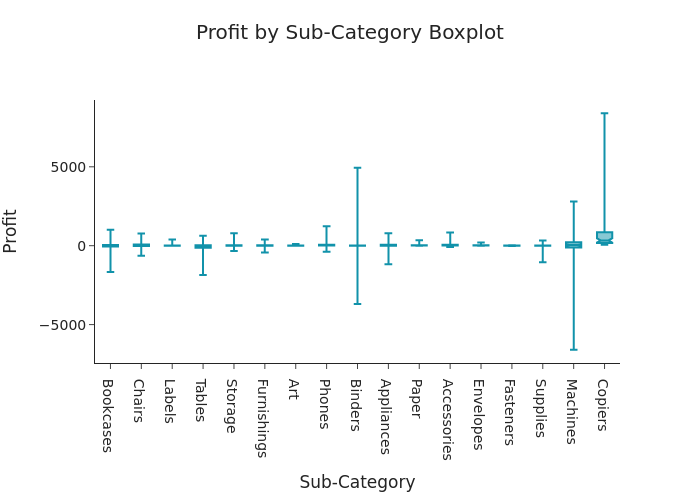

In [42]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:

* **Furniture has significantly lower total profit value among other categories.**
* **Tables, Bookcases and Supplies have negative total profit values.**
* **Considering median profit value Technology category is a clear leader.**
* **Tables is the only one category with negative median profit value.**
* **Considering median profit value Copiers sub-category is a clear leader with a huge gap (almost 9 times better than Machines).**
* **Considering mean profit value Technology category is a clear leader.**
* **Considering mean profit value Copiers sub-category is a clear leadr with a huge gap (about 15 times better than Accessories).**
* **Tables, Bookcases and Supplies have negative mean profit values.**
* **All categories have small q1 and q3 differences.**
* **All categories have huge range values. Technology category has the highest range value (about 15,000)**
* **Machines and Blinders categories have anomalously low minumum values, while their mean profit values are above 0 (this is most likely caused by discounts, the impact of which I will analyze in the bonus category).**

****

## Total Quantity

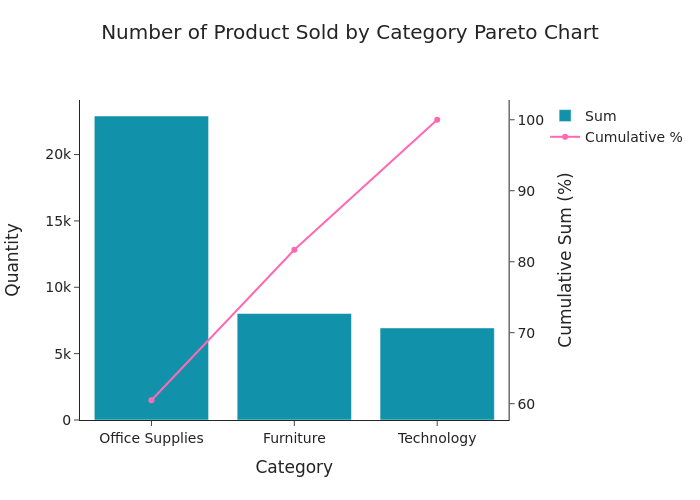

In [43]:
## CREATE NEW TABLE
# group by category
quantity_per_category = data[['Category', 'Quantity']].groupby('Category').sum()

# sort values by Sales
quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
quantity_per_category['cumperc'] = quantity_per_category.cumsum()/quantity_per_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = quantity_per_category.index,
           y = quantity_per_category['Quantity'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = quantity_per_category.index,
               y = quantity_per_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Product Sold by Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Quantity", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show("png") # for GitHub version

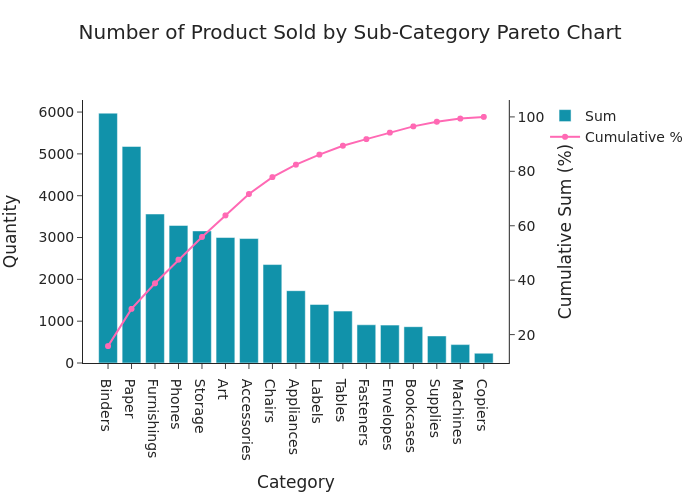

In [44]:
## CREATE NEW TABLE
# group by sub-category
quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').sum()

# sort values by Sales
quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
quantity_per_sub_category['cumperc'] = quantity_per_sub_category.cumsum()/quantity_per_sub_category.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = quantity_per_sub_category.index,
           y = quantity_per_sub_category['Quantity'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = quantity_per_sub_category.index,
               y = quantity_per_sub_category['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Category",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Product Sold by Sub-Category Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Quantity", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show("png") # for GitHub version

## Median Quantity

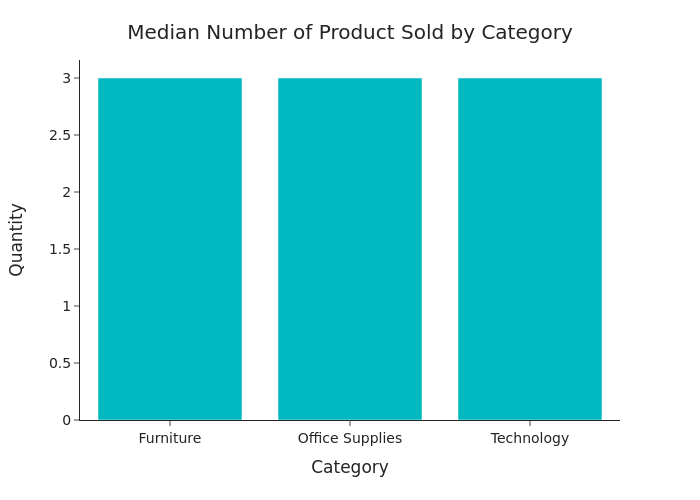

In [45]:
## CREATE NEW TABLE
# group by category
median_quantity_per_category = data[['Category', 'Quantity']].groupby('Category').median()

# sort values by Sales
median_quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_category.index,
             y = median_quantity_per_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Number of Product Sold by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

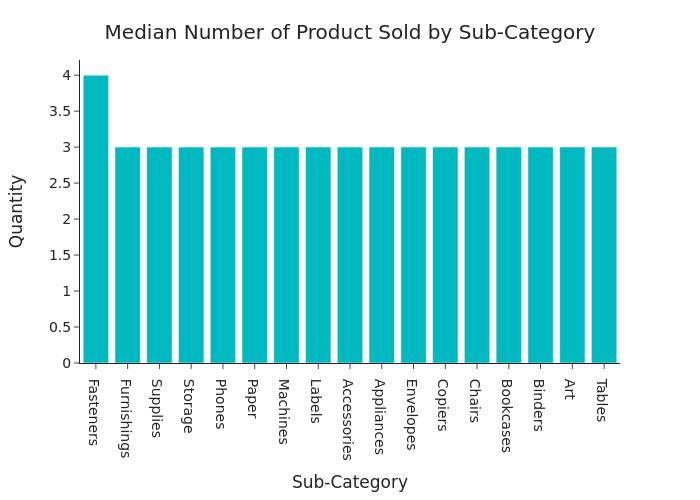

In [46]:
## CREATE NEW TABLE
# group by category
median_quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').median()

# sort values by Sales
median_quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_sub_category.index,
             y = median_quantity_per_sub_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Number of Product Sold by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean Quantity

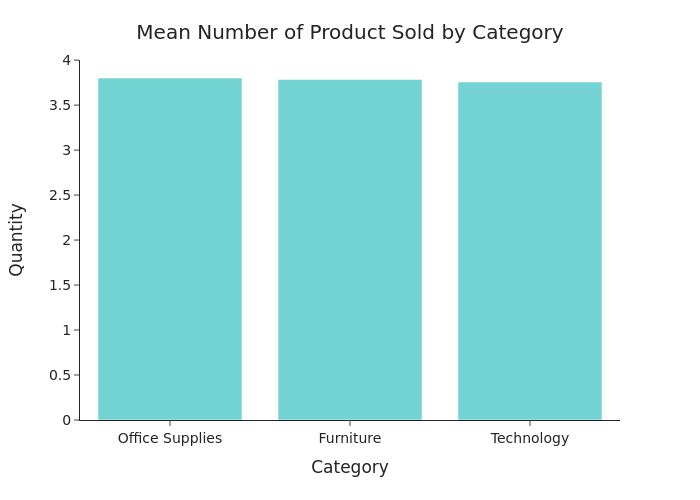

In [47]:
## CREATE NEW TABLE
# group by category
mean_quantity_per_category = data[['Category', 'Quantity']].groupby('Category').mean()

# sort values by Sales
mean_quantity_per_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_category.index,
             y = mean_quantity_per_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Number of Product Sold by Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

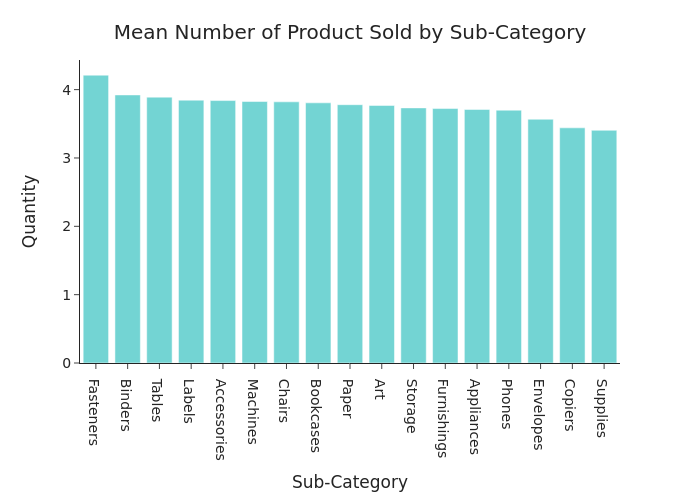

In [48]:
## CREATE NEW TABLE
# group by category
mean_quantity_per_sub_category = data[['Sub-Category', 'Quantity']].groupby('Sub-Category').mean()

# sort values by Sales
mean_quantity_per_sub_category.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_sub_category.index,
             y = mean_quantity_per_sub_category['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Number of Product Sold by Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Quantity Boxplot

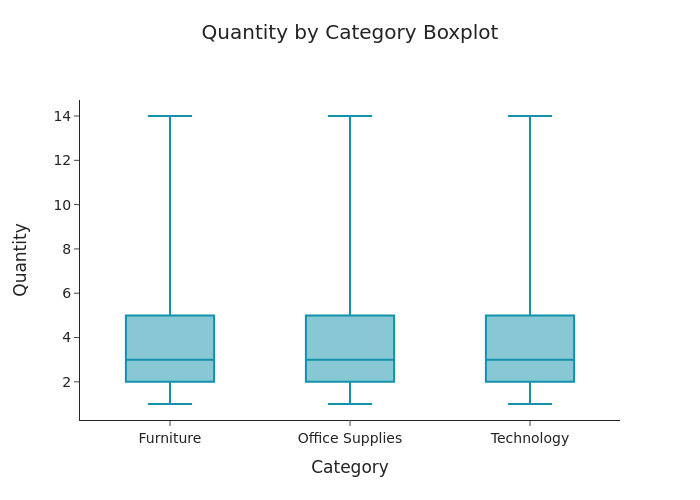

In [49]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Category'],
           y = data['Quantity'],
           notched = False,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Quantity by Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

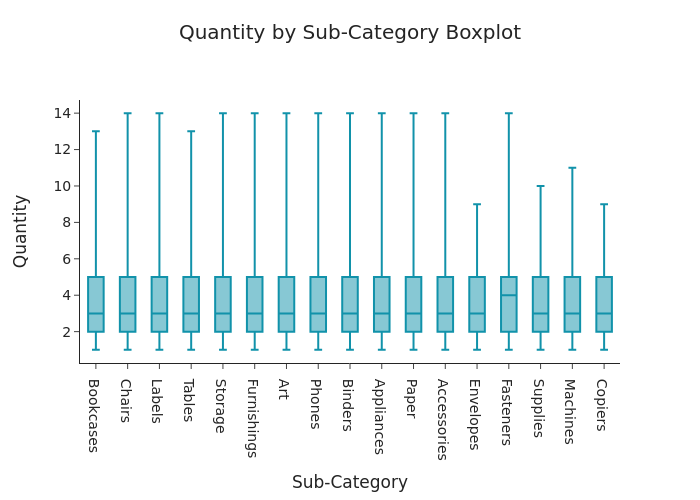

In [50]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Sub-Category'],
           y = data['Quantity'],
           notched = False,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Quantity by Sub-Category Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:

* **Office Supplies is the most sold category by number of product and makes up about 60% of orders.**
* **Blinders, Paper, Furnishing and Phones are 4 the most sold sub-categories by number of pruduct and they make up almost 50% of orders.**
* **Considering median and mean number of product sold all categories show similar performance.**
* **Considering median and mean number of product sold Fasterns perform slightly better than other sub-categories.**
* **Considering Quantity Boxplot all categories show identical performance.**
* **Considering Quantity Boxplot Envelopes and Copiers sub-categories differ in that the value of the maximum number is lower than in other sub-categories.**

****

## Quantity & Profit Correlation

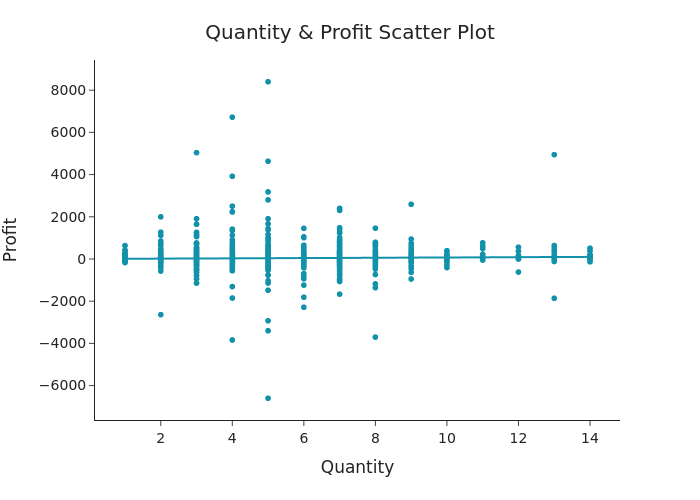

In [51]:
fig = px.scatter(x = data['Quantity'],
                 y = data['Profit'],
                 trendline = 'ols',
                 template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Quantity & Profit Scatter Plot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

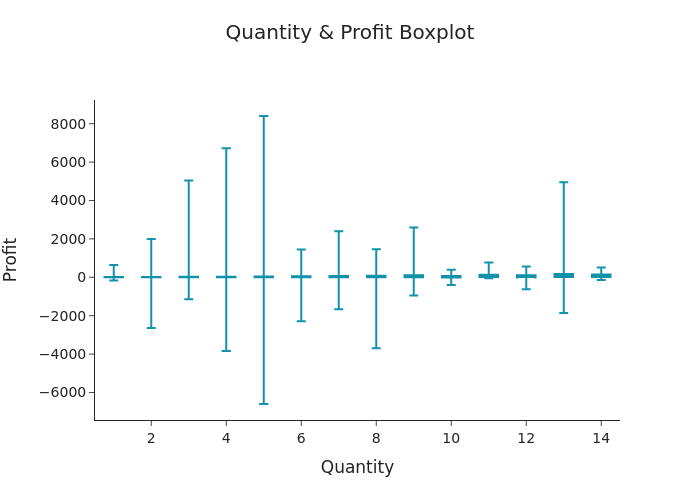

In [52]:
# boxplot
fig = go.Figure(
    go.Box(x = data['Quantity'],
           y = data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Quantity",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Quantity & Profit Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

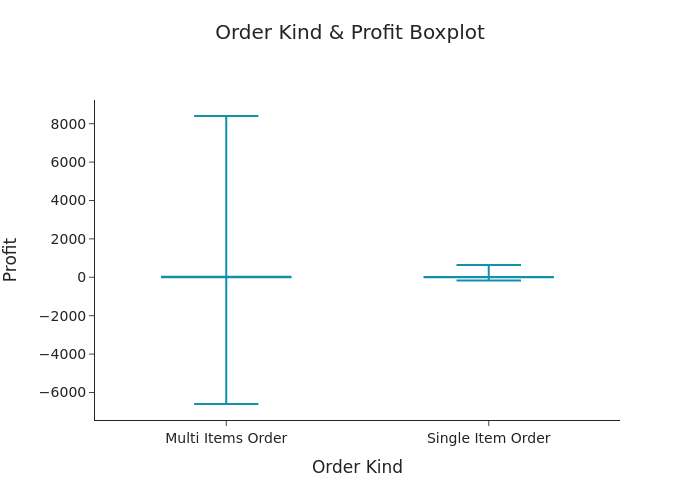

In [53]:
#create new table
multi_order_data = data.loc[:, ['Quantity', 'Profit']]
multi_order_data['Order_kind'] = multi_order_data['Quantity'].replace(range(2, 15), 'Multi Items Order')
multi_order_data['Order_kind'] = multi_order_data['Order_kind'].replace(1, 'Single Item Order')

# boxplot
fig = go.Figure(
    go.Box(x = multi_order_data['Order_kind'],
           y = multi_order_data['Profit'],
           notched = True,
           boxpoints = False,
           marker_color = colors[0])
)


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Order Kind",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Order Kind & Profit Boxplot",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:

* **No clear correlation between quantity and profit was found. Very low R-squared value (=0.0044).**
* **Orders with 4 or 5 number of items have a high range value in profit (low min and high max values).**
* **Orders with single item more stable in terms of profit value rather than orders with multiple items (they have low min and high max values).**

****

## Profit Margin

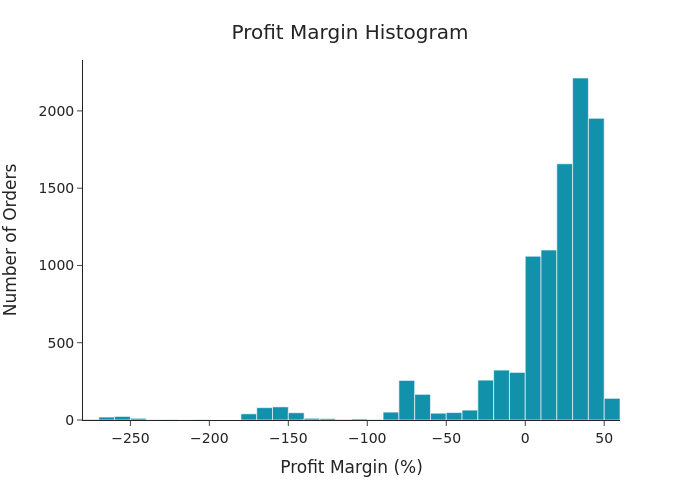

In [54]:
# Create Profit Margin column
data['Profit Margin'] = data['Profit'] / data['Sales'] * 100

# plot
fig = px.histogram(data['Profit Margin'],
                   nbins=40,
                   template = 'simple_white',
                   color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Number of Orders",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin Histogram",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )


fig.show("png") # for GitHub version

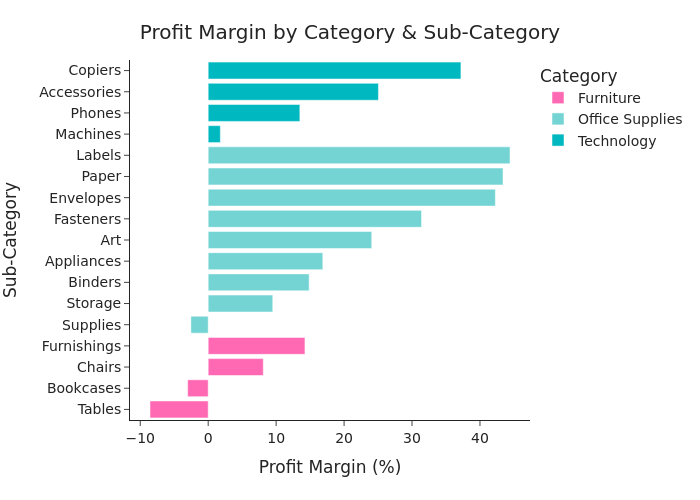

In [55]:
## CREATE NEW TABLE
# group by category and subcategory
margin_per_subcategory = data.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_subcategory['Profit Margin'] = margin_per_subcategory['Profit'] / margin_per_subcategory['Sales'] * 100

# sort values by Sales
margin_per_subcategory.sort_values(by='Profit Margin', inplace = True)


## PLOT
# bar chart
fig = px.bar(x = margin_per_subcategory['Profit Margin'],
             y = margin_per_subcategory['Sub-Category'],
             color = margin_per_subcategory['Category'],
             orientation = 'h',
             template = 'simple_white', 
             color_discrete_sequence = np.flip(colors))

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Sub-Category",
    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin by Category & Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

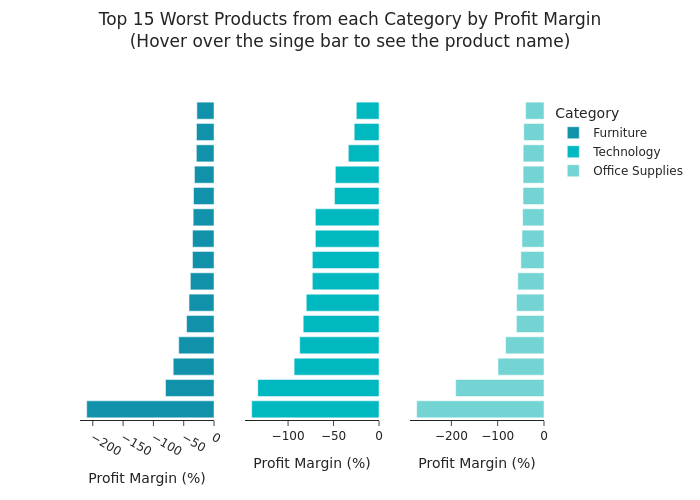

In [56]:
from plotly.subplots import make_subplots
## CREATE NEW TABLE
# group by category and subcategory
margin_per_product = data.groupby(['Category', 'Product Name'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_product['Profit Margin'] = margin_per_product['Profit'] / margin_per_product['Sales'] * 100

# sort values by Sales
margin_per_product.sort_values(by='Profit Margin', ascending = True, inplace = True)


## PLOT
fig = make_subplots(rows=1, cols=3)

# bar chart
fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Furniture']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Furniture']['Product Name'][:15],
           orientation = 'h',
           name = 'Furniture',
           marker_color = colors[0],
                    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Technology']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Technology']['Product Name'][:15],
           orientation = 'h',
           name = 'Technology',
           marker_color = colors[1],
           yaxis="y2",
           xaxis="x2"
                    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = margin_per_product.loc[margin_per_product['Category'] == 'Office Supplies']['Profit Margin'][:15],
           y = margin_per_product.loc[margin_per_product['Category'] == 'Office Supplies']['Product Name'][:15],
           orientation = 'h',
           name = 'Office Supplies',
           marker_color = colors[2],
           yaxis="y3",
           xaxis="x3"
                    ),
    row=1, col=3
)

# Fix axes:

fig.update_layout(
    yaxis=dict(
        visible = False
    ),
    xaxis=dict(
        title = "Profit Margin (%)"
    ),
    yaxis2=dict(
        visible = False
    ),
     xaxis2=dict(
        title = "Profit Margin (%)"
    ),
    yaxis3=dict(
        visible = False
    ),
    xaxis3=dict(
        title = "Profit Margin (%)"
    )
)


#Set Title and x/y axis labels
fig.update_layout(

    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 12
            ),    
    title={
        'text': "Top 15 Worst Products from each Category by Profit Margin<br>(Hover over the singe bar to see the product name)",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:
* **Most of the orders got 20-50% profit margin value, however there are some examples of abnormally small values (bins like -270 to -240 and -180 to -140).**
* **Technology is the only category that contains sub-ategories with only positive profit margin values.**
* **Supplies, Bookcases and Tables have the lowest profit margin values out of all sub-categories.**
* **There are some products from each category that have abnormally low profit margin values.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CUSTOMER ANALYSIS</div>

## Total  Sales 

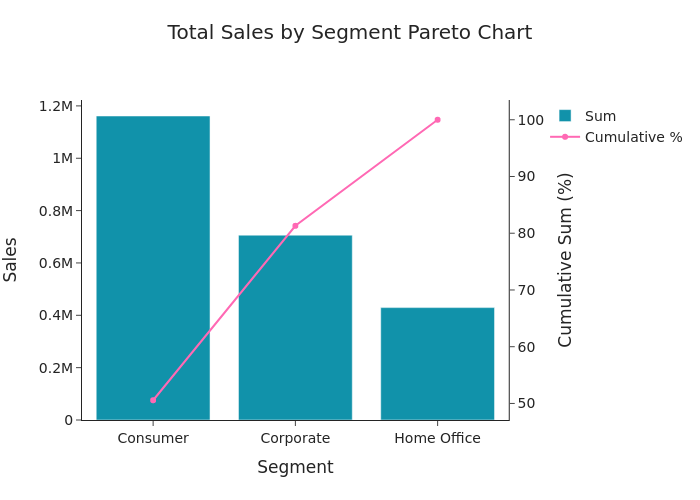

In [57]:
## CREATE NEW TABLE
# group by segment
sales_per_segment = data[['Segment', 'Sales']].groupby('Segment').sum()

# sort values by Sales
sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

# add new column with cumulative sum in % to the sales_per_category data
sales_per_segment['cumperc'] = sales_per_segment.cumsum()/sales_per_segment.sum() * 100


## PLOT
# create figure
fig = make_subplots(specs=[[{"secondary_y": True}]])

# add simple bar chart
fig.add_trace(
    go.Bar(x = sales_per_segment.index,
           y = sales_per_segment['Sales'],
           name = "Sum",
           marker_color = colors[0]
           )
)

# add line chart with values from cumperc column
fig.add_trace(
    go.Scatter(x = sales_per_segment.index,
               y = sales_per_segment['cumperc'],
               name = "Cumulative %",
               line=dict(color='hotpink', width=2)),
    secondary_y=True,
)

# layout
fig.update_layout(
    xaxis_title="Segment",
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Segment Pareto Chart",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
)

# axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Cumulative Sum (%)", secondary_y=True)

fig.show("png") # for GitHub version

## Median  Sales

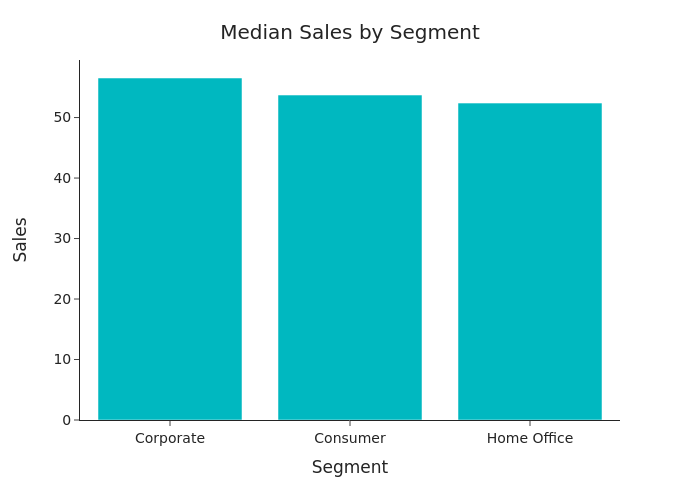

In [58]:
## CREATE NEW TABLE
# group by segment
median_sales_per_segment = data[['Segment', 'Sales']].groupby('Segment').median()

# sort values by Sales
median_sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_sales_per_segment.index,
             y = median_sales_per_segment['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Sales by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean  Sales

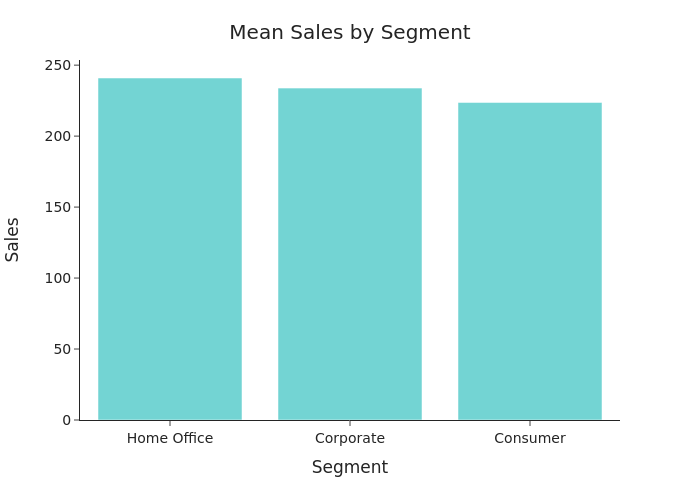

In [59]:
## CREATE NEW TABLE
# group by segment
mean_sales_per_segment = data[['Segment', 'Sales']].groupby('Segment').mean()

# sort values by Sales
mean_sales_per_segment.sort_values(by='Sales', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_sales_per_segment.index,
             y = mean_sales_per_segment['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Sales by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Inference:
* **Considering total sales Consumer segment is a clear leader and makes up to 50% of all sales.**
* **Considering median sales all segments perform the same.**
* **Cinsidering mean sales all segments perform the same.**

****

## Total  Profit

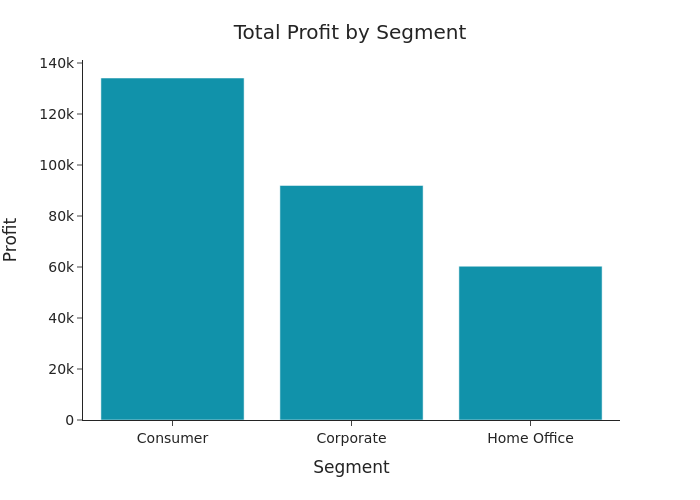

In [60]:
## CREATE NEW TABLE
# group by segment
profit_per_segment = data[['Segment', 'Profit']].groupby('Segment').sum()

# sort values by Sales
profit_per_segment.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = profit_per_segment.index,
             y = profit_per_segment['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Median  Profit

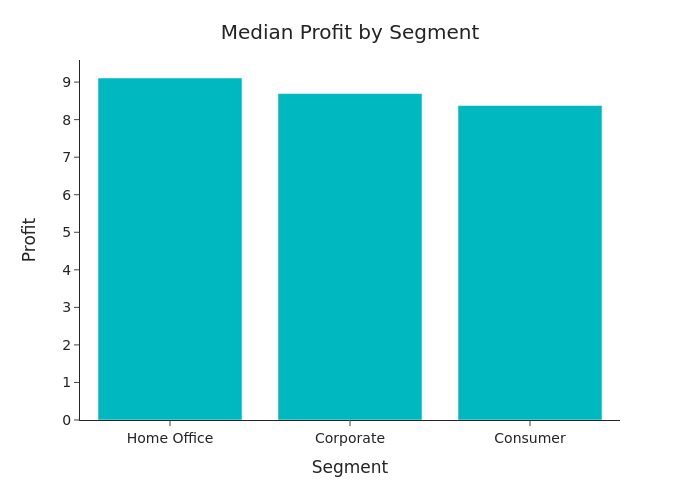

In [61]:
## CREATE NEW TABLE
# group by segment
median_profit_per_segment = data[['Segment', 'Profit']].groupby('Segment').median()

# sort values by Sales
median_profit_per_segment.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_profit_per_segment.index,
             y = median_profit_per_segment['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Profit by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean  Profit

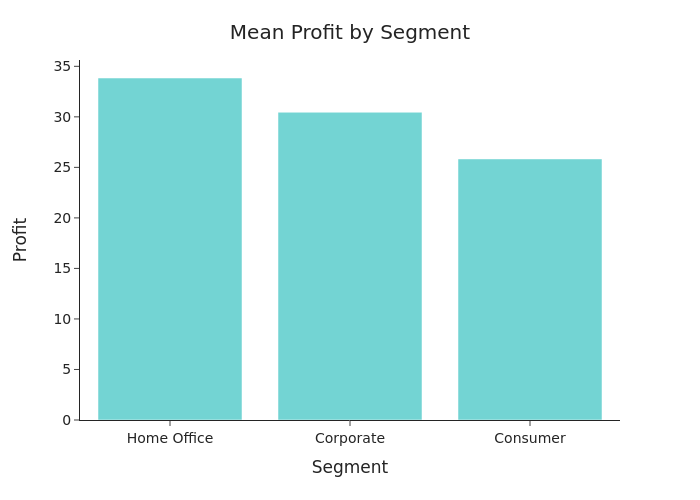

In [62]:
## CREATE NEW TABLE
# group by segment
mean_profit_per_segment = data[['Segment', 'Profit']].groupby('Segment').mean()

# sort values by Sales
mean_profit_per_segment.sort_values(by='Profit', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_profit_per_segment.index,
             y = mean_profit_per_segment['Profit'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Profit by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Inference:
* **Considering total profit Consumer segment is a clear leader, followed by Corporate segment.**
* **Considering median and mean profit Home Office segment is a leader followed by Corporate and Consumer segments.**

****

## Total  Quantity

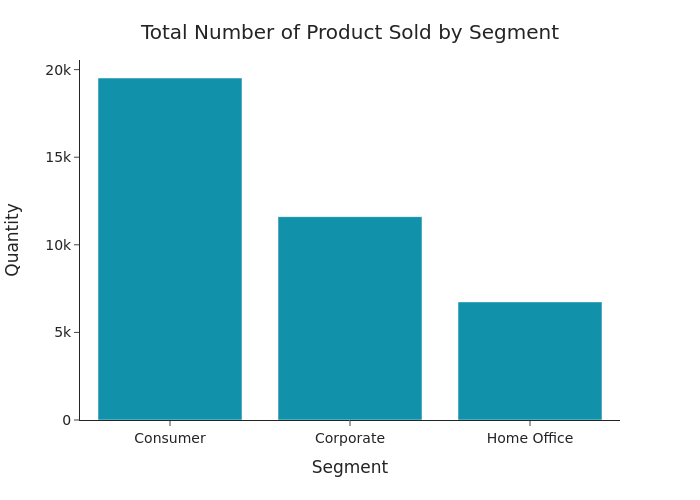

In [63]:
## CREATE NEW TABLE
# group by category
quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').sum()

# sort values by Sales
quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = quantity_per_segment.index,
             y = quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Median  Quantity

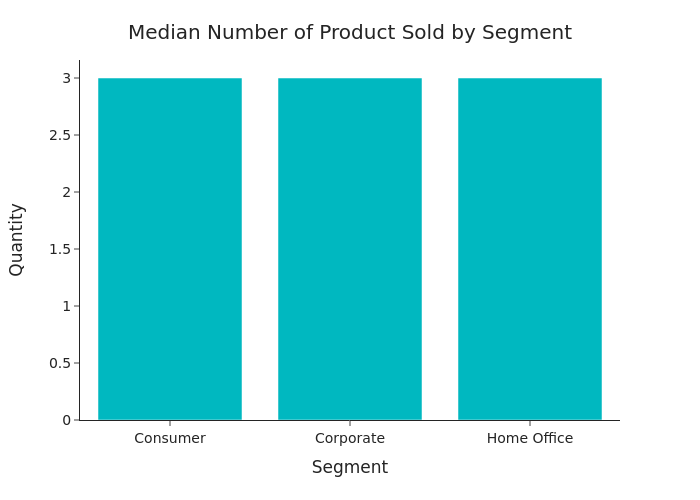

In [64]:
## CREATE NEW TABLE
# group by category
median_quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').median()

# sort values by Sales
median_quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_segment.index,
             y = median_quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Mean  Quantity

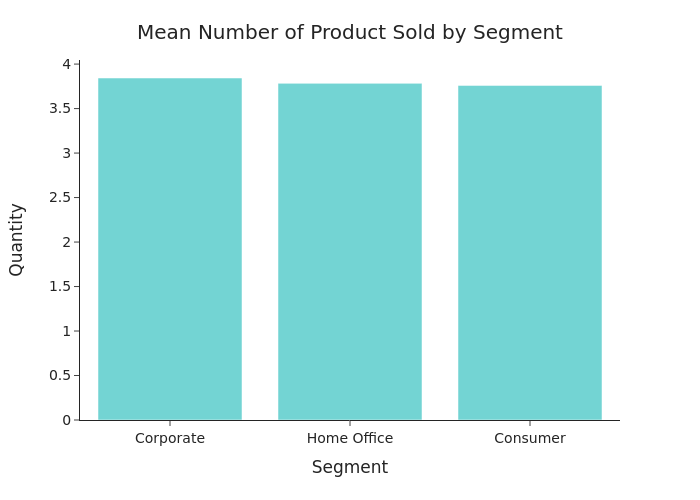

In [65]:
## CREATE NEW TABLE
# group by category
mean_quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').mean()

# sort values by Sales
mean_quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_segment.index,
             y = mean_quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Inference:
* **Considering total number of product sold consumer segment is a clear leader**
* **Considering median and mean numbers of product sold all segments perform the same.**

****

## Profit  Margin

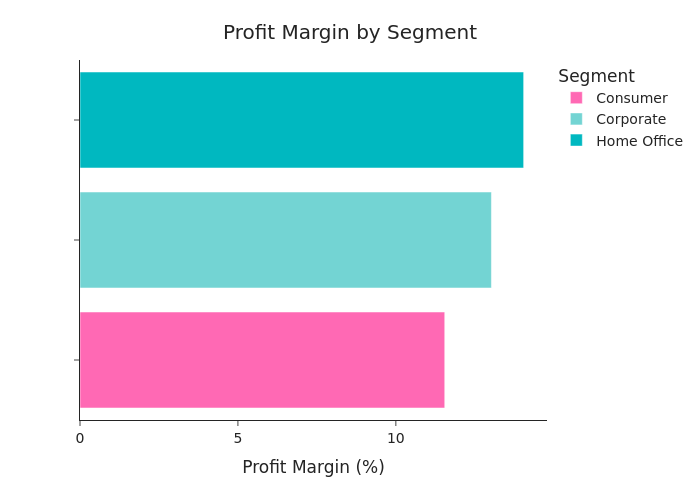

In [66]:
## CREATE NEW TABLE
# group by segment
margin_per_segment = data.groupby('Segment', as_index=False)[['Sales', 'Profit']].sum()
margin_per_segment['Profit Margin'] = margin_per_segment['Profit'] / margin_per_segment['Sales'] * 100

# sort values by Sales
margin_per_segment.sort_values(by='Profit Margin', inplace = True)


## PLOT
# bar chart
fig = px.bar(x = margin_per_segment['Profit Margin'],
             y = margin_per_segment['Segment'],
             color = margin_per_segment['Segment'],
             #orientation = 'h',
             template = 'simple_white', 
             color_discrete_sequence = np.flip(colors))

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="",
    legend_title="Segment",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin by Segment",
        'y':0.95,
        'x':0.5
        },
    yaxis=dict(
        showticklabels=False
    ),
    )

fig.show("png") # for GitHub version

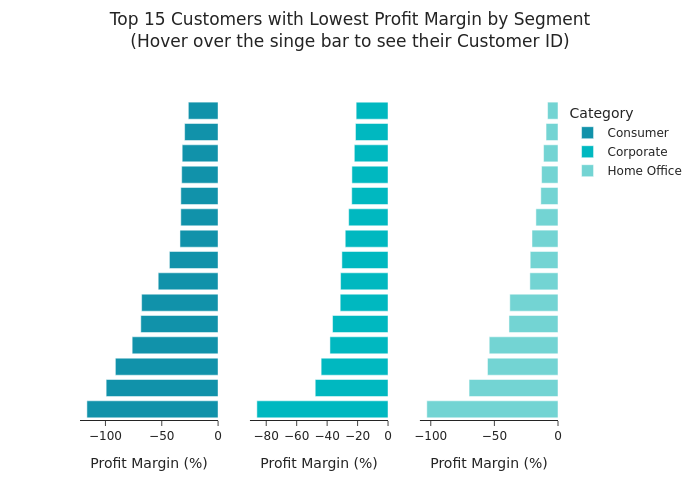

In [67]:
## CREATE NEW TABLE
# group by segment and customer id
margin_per_segment = data.groupby(['Segment', 'Customer ID'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_segment['Profit Margin'] = margin_per_segment['Profit'] / margin_per_segment['Sales'] * 100

# sort values by Sales
margin_per_segment.sort_values(by='Profit Margin', ascending = True, inplace = True)


## PLOT
fig = make_subplots(rows=1, cols=3)

# bar chart
fig.add_trace(
    go.Bar(x = margin_per_segment.loc[margin_per_segment['Segment'] == 'Consumer']['Profit Margin'][:15],
           y = margin_per_segment.loc[margin_per_segment['Segment'] == 'Consumer']['Customer ID'][:15],
           orientation = 'h',
           name = 'Consumer',
           marker_color = colors[0],
                    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x = margin_per_segment.loc[margin_per_segment['Segment'] == 'Corporate']['Profit Margin'][:15],
           y = margin_per_segment.loc[margin_per_segment['Segment'] == 'Corporate']['Customer ID'][:15],
           orientation = 'h',
           name = 'Corporate',
           marker_color = colors[1],
           yaxis="y2",
           xaxis="x2"
                    ),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x = margin_per_segment.loc[margin_per_segment['Segment'] == 'Home Office']['Profit Margin'][:15],
           y = margin_per_segment.loc[margin_per_segment['Segment'] == 'Home Office']['Customer ID'][:15],
           orientation = 'h',
           name = 'Home Office',
           marker_color = colors[2],
           yaxis="y3",
           xaxis="x3"
                    ),
    row=1, col=3
)

# Fix axes:

fig.update_layout(
    yaxis=dict(
        visible = False
    ),
    xaxis=dict(
        title = "Profit Margin (%)"
    ),
    yaxis2=dict(
        visible = False
    ),
     xaxis2=dict(
        title = "Profit Margin (%)"
    ),
    yaxis3=dict(
        visible = False
    ),
    xaxis3=dict(
        title = "Profit Margin (%)"
    )
)


#Set Title and x/y axis labels
fig.update_layout(

    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 12
            ),    
    title={
        'text': "Top 15 Customers with Lowest Profit Margin by Segment<br>(Hover over the singe bar to see their Customer ID)",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white'
    )

fig.show("png") # for GitHub version

## Inference:
* **Considering profit margin value Home Office segment is a clear leader, followed by Corporate segment.**
* **There are some individual customers with abnormally low proft margin values.**

****

## Regular Customers

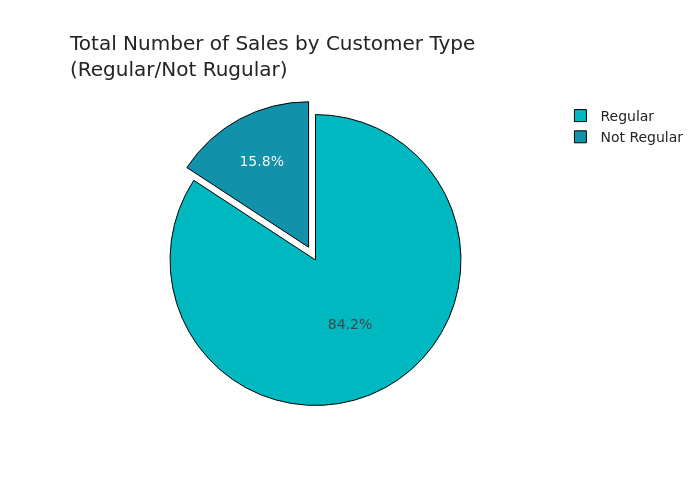

In [68]:
## CREATE TABLE

# let's say customer is regular if they have 10 or more orders:

regular_customers = data.groupby('Customer ID', as_index = False)['Order ID'].count()

# it's not the best method to do this, but I now exact max value is 37, so i can replace "manualy"
regular_customers = regular_customers.replace(range(1, 10), 1)
regular_customers = regular_customers.replace(range(10, 38), 2)

# goupby one more table with sum profit and sales for future join
customers_sales_profit = data[['Sales', 'Profit', 'Customer ID']].groupby('Customer ID', as_index = False).sum()

# now join sales and profit values
regular_customers_merged = pd.merge(left = regular_customers, right = customers_sales_profit, how = 'left', on = 'Customer ID')

# drop customer id column
regular_customers_merged.drop(columns = 'Customer ID', inplace = True)

# rename Order ID column to Customer and replace values 1 and 2 to Not Regular and Regular
regular_customers_merged.rename(columns = {'Order ID': 'Customer'}, inplace = True)
regular_customers_merged['Customer'] = regular_customers_merged['Customer'].replace({1:'Not Regular', 2: 'Regular'})

#groupby Customer column:
regular_customers = regular_customers_merged.groupby('Customer', as_index = False).sum()

regular_customers_merged
## PLOT

fig = go.Figure(go.Pie(labels = regular_customers['Customer'],
                 values = regular_customers['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000', 
                    width=1
            )
    ),
    pull=[0.1, 0]
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Number of Sales by Customer Type<br>(Regular/Not Rugular)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show("png") # for GitHub version

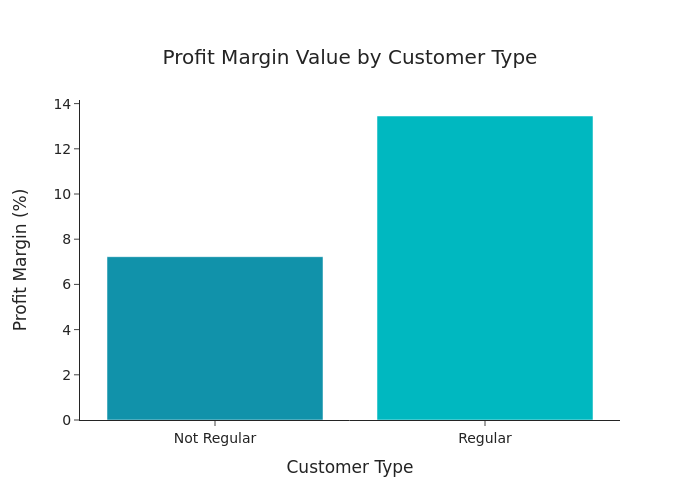

In [69]:
## CREATE TABLE

# let's say customer is regular if they have 10 or more orders:

regular_customers = data.groupby('Customer ID', as_index = False)['Order ID'].count()

# it's not the best method to do this, but I now exact max value is 37, so i can replace "manualy":
regular_customers = regular_customers.replace(range(1, 10), 1)
regular_customers = regular_customers.replace(range(10, 38), 2)

# goupby one more table with sum profit and sales for future join:
customers_sales_profit = data[['Sales', 'Profit', 'Customer ID']].groupby('Customer ID', as_index = False).sum()

# now join sales and profit values:
regular_customers_merged = pd.merge(left = regular_customers, right = customers_sales_profit, how = 'left', on = 'Customer ID')

# drop customer id column:
regular_customers_merged.drop(columns = 'Customer ID', inplace = True)

# rename Order ID column to Customer and replace values 1 and 2 to Not Regular and Regular:
regular_customers_merged.rename(columns = {'Order ID': 'Customer'}, inplace = True)
regular_customers_merged['Customer'] = regular_customers_merged['Customer'].replace({1:'Not Regular', 2: 'Regular'})

#groupby Customer column:
regular_customers = regular_customers_merged.groupby('Customer', as_index = False).sum()

#create profit margin column:
margin_regular_customers = regular_customers.copy()
margin_regular_customers['Profit Margin'] = regular_customers['Profit'] / regular_customers['Sales'] * 100

## PLOT

fig = go.Figure(go.Bar(x = margin_regular_customers['Customer'],
                 y = margin_regular_customers['Profit Margin'],
                 )
        )
fig.update_traces(
    marker=dict(
            color=colors,
    ),
   # pull=[0.1, 0]
)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "Customer Type",
    yaxis_title = "Profit Margin (%)",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin Value by Customer Type",
        'y':0.9,
        'x':0.5
        },
    template = 'simple_white',
    )

fig.show("png") # for GitHub version

## Inference:
* **Most of the sales comes from regular customers. Even though I chose pretty high value to determine either customer is Regular or Not (that is minimum 10 orders) Regular Customers is a majority in this dataset.**
* **Regular Customers have higher value of profit margin, almost twice as much as for Not Regular Customers.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TIME SERIES ANALYSIS</div>

## Sales

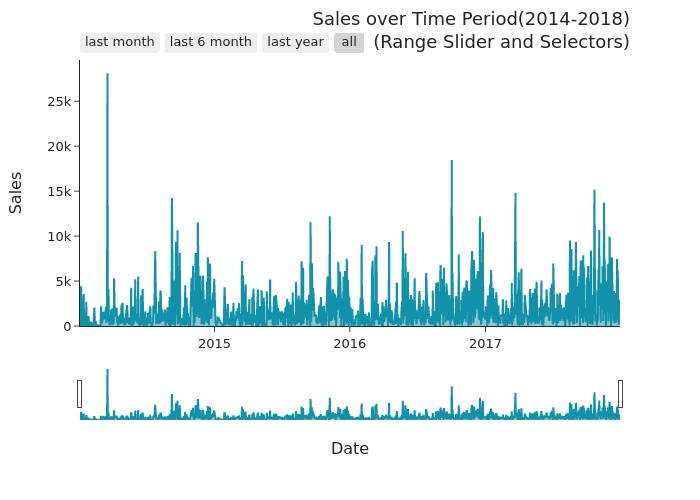

In [70]:
# create timeseries table, group by order date and sum sales and profit
data_timeseries = data.copy()
data_timeseries = data_timeseries[['Order Date', 'Sales', 'Profit']].groupby('Order Date', as_index = False).sum()

# convert order date column to timestemp datatype
data_timeseries['Order Date'] = pd.to_datetime(data_timeseries['Order Date'])

# sort by date
data_timeseries = data_timeseries.sort_values(by = 'Order Date')

# Plot

fig = px.area(x = data_timeseries['Order Date'],
              y = data_timeseries['Sales'],
              template = 'simple_white',
              color_discrete_sequence = colors,
             )

# layout
fig.update_layout(
    yaxis_title = "Sales",
    xaxis_title="Date",
    font = dict(
            size = 13
            ),    
    title={
        'text': "Sales over Time Period(2014-2018)<br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    template = 'simple_white'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="last month", step="month", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show("png") # for GitHub version

## Profit

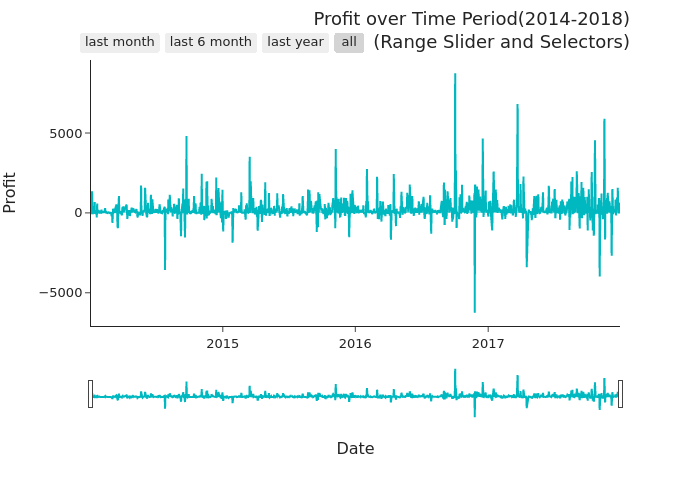

In [71]:
# Plot

fig = px.area(x = data_timeseries['Order Date'],
              y = data_timeseries['Profit'],
              template = 'simple_white',
              color_discrete_sequence = [colors[1]],
             )

# layout
fig.update_layout(
    yaxis_title = "Profit",
    xaxis_title="Date",
    font = dict(
            size = 13
            ),    
    title={
        'text': "Profit over Time Period(2014-2018)<br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    template = 'simple_white'
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="last month", step="month", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show("png") # for GitHub version

## Sales &  Profit

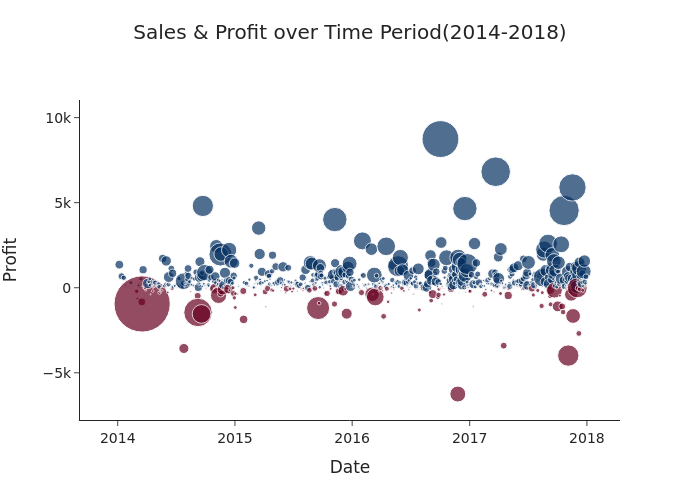

In [72]:
data_timeseries['Profitable'] = data_timeseries['Profit'] / abs(data_timeseries['Profit'])
data_timeseries['Profitable'] = data_timeseries['Profitable'].fillna(0)
data_timeseries['Profitable'] = data_timeseries['Profitable'].astype(int)

fig = go.Figure(go.Scatter( 
                 x = data_timeseries['Order Date'],
                 y = data_timeseries['Profit'],
                 mode='markers',
                 marker=dict(
                         size = data_timeseries['Sales']/500,
                         color= data_timeseries['Profitable'])
             )
               )
# layout
fig.update_layout(
    yaxis_title = "Profit",
    xaxis_title="Date",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Sales & Profit over Time Period(2014-2018)",
        'y':0.95,
        'x':0.5
        },
    template = 'simple_white',
)

fig.show("png") # for GitHub version

## Order Date and Ship Date

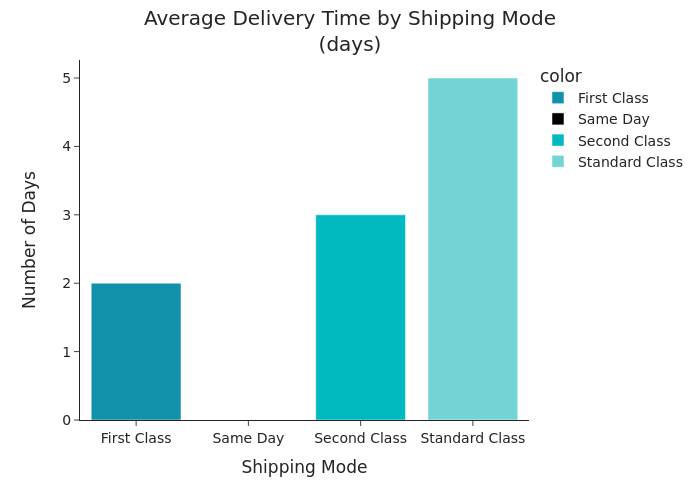

In [73]:
# create table
data_shipping_time = data.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])
ship_mode_and_time = data_shipping_time.groupby('Ship Mode', as_index = False)['Shipping Time'].mean()
ship_mode_and_time['Shipping Time'] = ship_mode_and_time['Shipping Time'].dt.days

# plot
fig = px.bar(x = ship_mode_and_time['Ship Mode'],
             y = ship_mode_and_time['Shipping Time'],
             color = ship_mode_and_time['Ship Mode'],
             template = 'simple_white',
             color_discrete_sequence = ['#1192AA','#000000','#00B8C0', '#73D4D3'])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Average Delivery Time by Shipping Mode<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

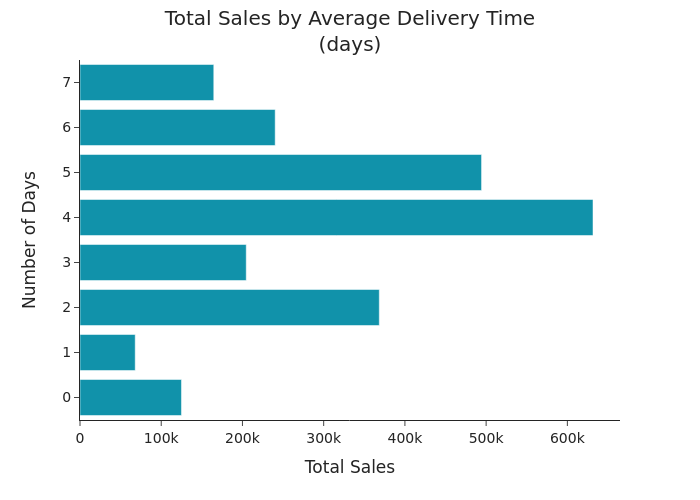

In [74]:
# create table
data_shipping_time = data.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

sales_data_shipping_time = data_shipping_time.sort_values(by = 'Sales')

# plot
fig = px.bar(x = sales_data_shipping_time['Sales'],
             y = sales_data_shipping_time['Shipping Time'],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = colors)

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Total Sales",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Average Delivery Time<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

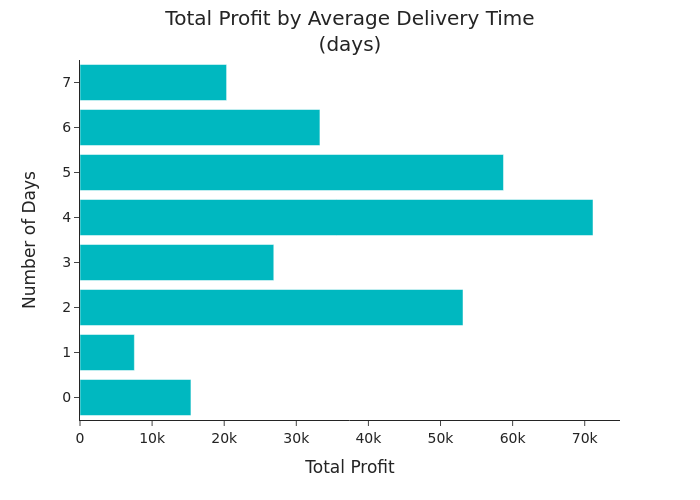

In [75]:
# create table
data_shipping_time = data.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

profit_data_shipping_time = data_shipping_time.sort_values(by = 'Profit')

# plot
fig = px.bar(x = profit_data_shipping_time['Profit'],
             y = profit_data_shipping_time['Shipping Time'],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Total Profit",
    yaxis_title="Number of Days",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by Average Delivery Time<br>(days)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

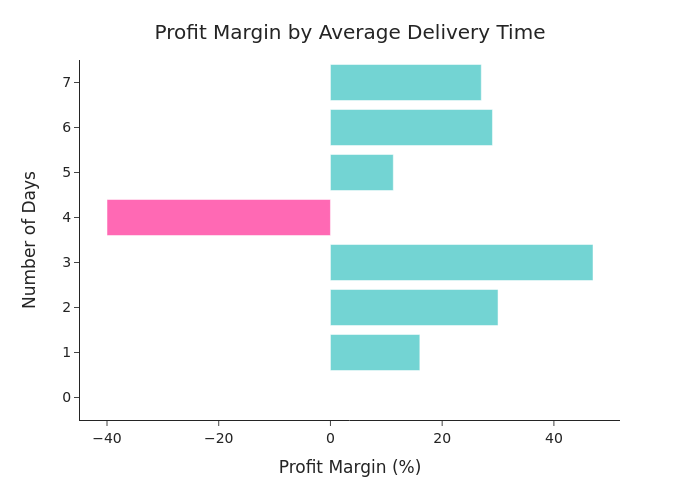

In [76]:
# create table
data_shipping_time = data.copy()
data_shipping_time['Shipping Time'] = pd.to_datetime(data_shipping_time['Ship Date']) - pd.to_datetime(data_shipping_time['Order Date'])

data_shipping_time['Shipping Time'] = data_shipping_time['Shipping Time'].dt.days

margin_data_shipping_time = data_shipping_time.groupby('Shipping Time', as_index = False).sum()

margin_data_shipping_time['Profit Margin'] = data_shipping_time['Profit'] / data_shipping_time['Sales'] * 100
# plot
fig = px.bar(x = margin_data_shipping_time['Profit Margin'],
             y = margin_data_shipping_time['Shipping Time'],
             color = [colors[2], colors[2], colors[2], colors[2], 'hotpink',  colors[2], colors[2], colors[2]],
             orientation = 'h',
             template = 'simple_white',
             color_discrete_sequence = [colors[2], 'hotpink']
            )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Number of Days",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin by Average Delivery Time",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Inference:
* **Sales and Profit series act normally. Some small sharp rises in sales are visible, for example on March 18, 2014 and October 2, 2016.**
* **Sales fluctuate more than Profit.**
* **There are several big bubbles, biggest red one (with a negative profit value) in March 2014. Big blue ones (with a positive profit value) began to appear more often after October 2016.**
* **On average, First Class orders take 2 days to deliver, Same Day 0 days (logicaly in the shipping in a same day), Second Class shipping take 3 days, and Standart Class 5 days.**
* **Total Sales and Total Profit distributed normally according to the number of days taken for delivery.**
* **Only orders that take 4 days to deliver make negative (and quite low) profit margin.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DISCOUNTS</div>

## Total   Sales

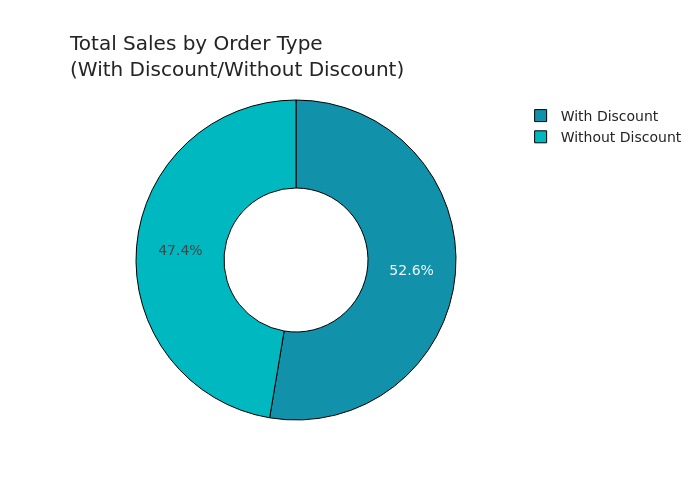

In [77]:
# create table
orders_with_discount = data.copy()
orders_with_discount['With Discount'] = orders_with_discount['Discount'].apply(lambda x: x > 0)
orders_with_discount.replace({False: 'Without Discount', True: 'With Discount'}, inplace = True)

orders_with_discount_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).sum()

# plot
fig = go.Figure(go.Pie(labels = orders_with_discount_sales['With Discount'],
                 values = orders_with_discount_sales['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000', 
                    width=1
            )
    ),
    hole = 0.45
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show("png") # for GitHub version

## Mean   Sales

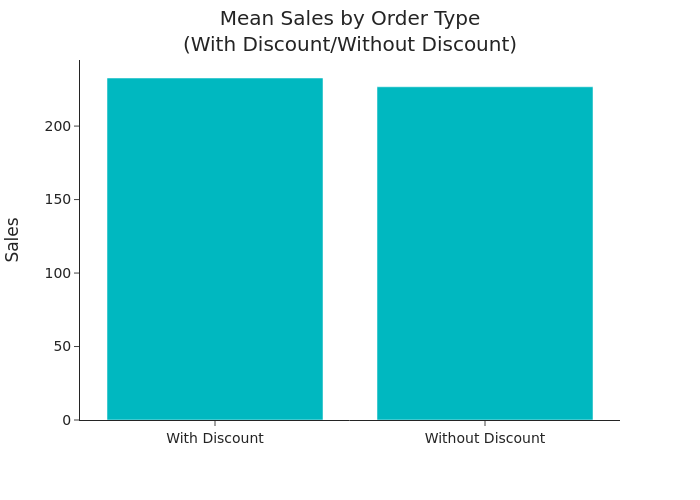

In [78]:
orders_with_discount_mean_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).mean()

## PLOT
# bar chart
fig = px.bar(x = orders_with_discount_mean_sales['With Discount'],
             y = orders_with_discount_mean_sales['Sales'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="",
    yaxis_title="Sales",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.95,
        'x':0.5
        }
    )

fig.show("png") # for GitHub version

## Total   Profit

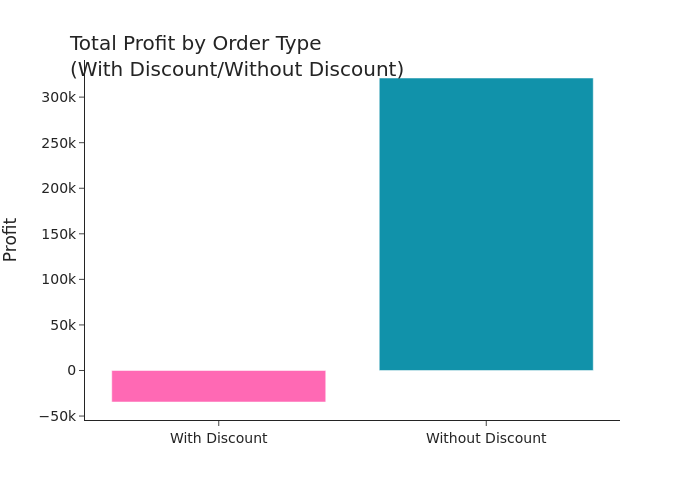

In [79]:
#create table
orders_with_discount_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).sum()

# plot
fig = px.bar(x = orders_with_discount_profit['With Discount'],
             y = orders_with_discount_profit['Profit'],
             color = orders_with_discount_profit['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[0]]
                 )


#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Profit by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show("png") # for GitHub version

## Mean   Profit

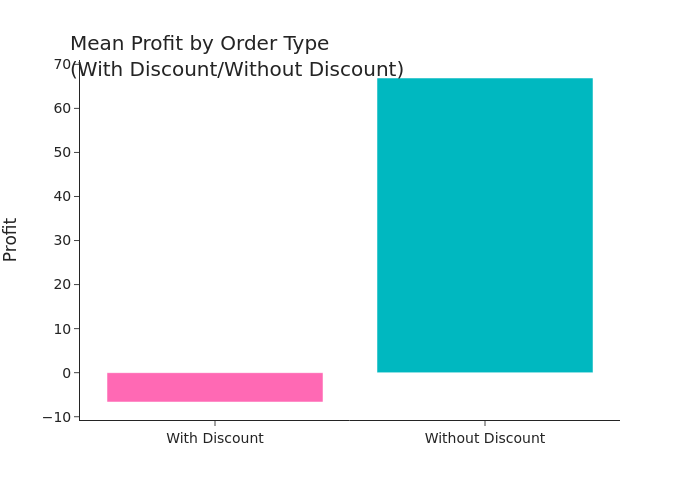

In [80]:
#create table
orders_with_discount_mean_profit = orders_with_discount[['With Discount', 'Profit']].groupby('With Discount', as_index = False).mean()

# plot
fig = px.bar(x = orders_with_discount_mean_profit['With Discount'],
             y = orders_with_discount_mean_profit['Profit'],
             color = orders_with_discount_mean_profit['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[1]]
                 )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Profit by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show("png") # for GitHub version

## Profit   Margin

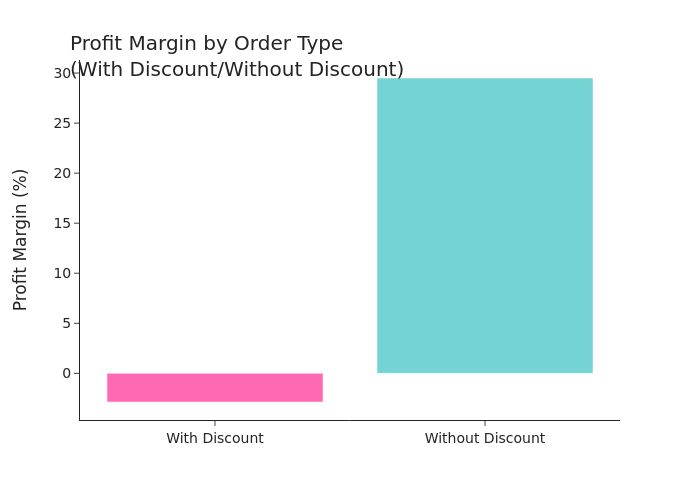

In [81]:
#create table
orders_with_discount_profit_margin = orders_with_discount[['With Discount', 'Profit', 'Sales']].groupby('With Discount', as_index = False).sum()
orders_with_discount_profit_margin['Profit Margin'] = orders_with_discount_profit_margin['Profit'] / orders_with_discount_profit_margin['Sales'] * 100
# plot
fig = px.bar(x = orders_with_discount_profit_margin['With Discount'],
             y = orders_with_discount_profit_margin['Profit Margin'],
             color = orders_with_discount_profit_margin['With Discount'],
             template = 'simple_white',
             color_discrete_sequence = ['hotpink', colors[2]]
                 )

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title = "",
    yaxis_title = "Profit Margin (%)",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        }
    )

fig.show("png") # for GitHub version

## Category Columns & Discount

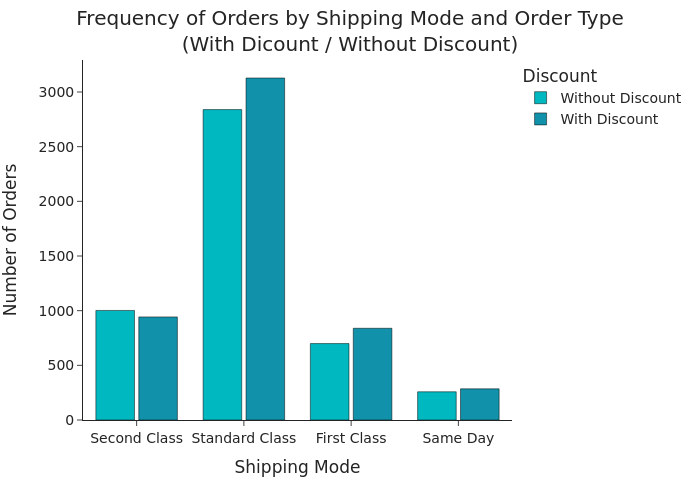

In [82]:
fig = px.histogram(x = orders_with_discount['Ship Mode'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Shipping Mode",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Shipping Mode and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show("png") # for GitHub version

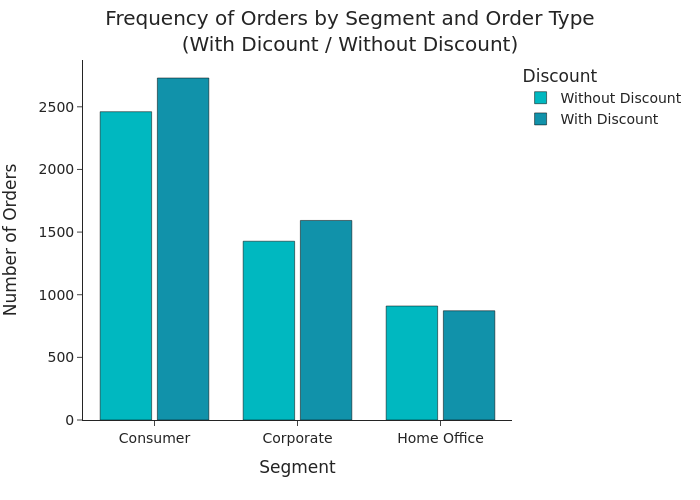

In [83]:
fig = px.histogram(x = orders_with_discount['Segment'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Segment and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show("png") # for GitHub version

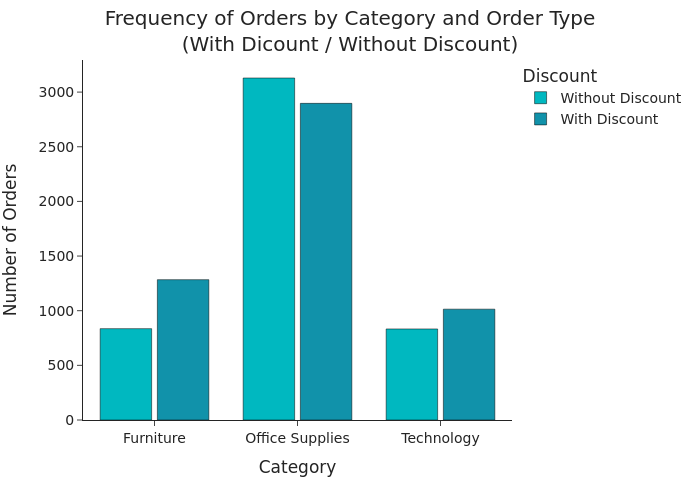

In [84]:
fig = px.histogram(x = orders_with_discount['Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show("png") # for GitHub version

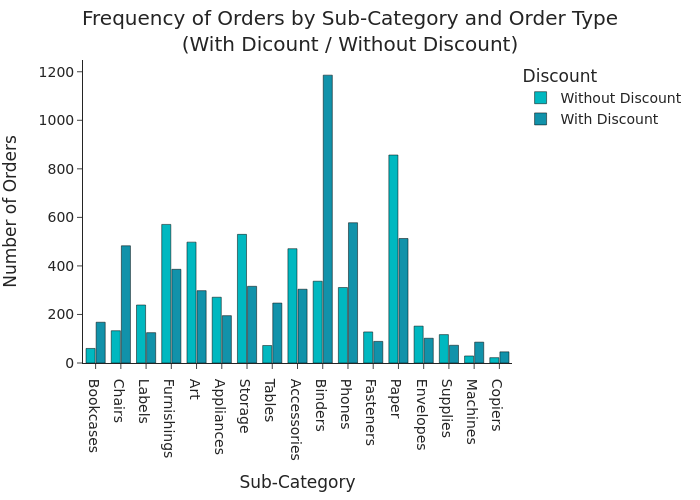

In [85]:
fig = px.histogram(x = orders_with_discount['Sub-Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Sub-Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show("png") # for GitHub version

## Geo Columns & Discount

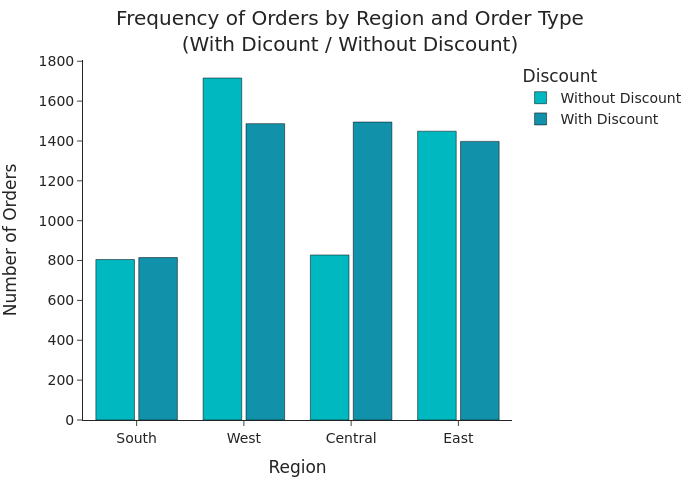

In [86]:
fig = px.histogram(x = orders_with_discount['Region'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Region and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show("png") # for GitHub version

In [87]:
# create table
orders_with_discount_map = orders_with_discount['State_abb'].to_frame()

for x in orders_with_discount['With Discount'].unique():
    orders_with_discount_map[x] = orders_with_discount.loc[orders_with_discount['With Discount'] == x]['With Discount']

# Group by State_abb and count
orders_with_discount_map = orders_with_discount_map[['With Discount', 'Without Discount', 'State_abb']].groupby('State_abb').count()

# Reset index and check first 3 rows from table
orders_with_discount_map.reset_index(inplace = True)
orders_with_discount_map.head(3)

,State_abb,With Discount,Without Discount
0,AL,0,61
1,AR,0,60
2,AZ,224,0


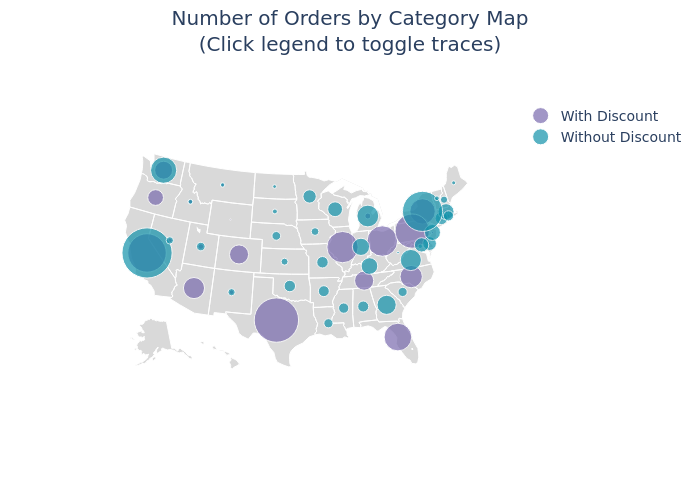

In [88]:
fig = go.Figure()

colors = ['#796AAE', '#1192AA']
columns = ['With Discount', 'Without Discount']

i = 0
for column in columns:
    fig.add_trace(go.Scattergeo(
         locations = orders_with_discount_map['State_abb'],
         locationmode = 'USA-states',
         marker = dict(
                 size = orders_with_discount_map[column],
                 color = colors[i],
                 sizemode = 'area'),
         name = column
    ))
    i += 1
                                                   
fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Number of Orders by Category Map<br>(Click legend to toggle traces)",
        'y':0.95,
        'x':0.5
        },
    geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
)
fig.show("png") # for GitHub version

## Inference: 
* **Distribution of Total Sales and Mean Sales by Order Type is approximately equal.**
* **Total Profit, Mean Profit and Profit Margin values of orders with discounts are negative.**
* **Considering Shipping mode the number of orders by type of order distributed fairly evenly.**
* **Considering Segment the number of orders by type of order distributed fairly evenly.**
* **Considering Segment the number of orders by type of order distributed fairly evenly.**
* **Considering Category the number of orders by type of order distributed fairly evenly.**
* **Considering Sub-Category there are some subcategories with high number of orders with discount (for example blinders, phones, chairs) and some orders with high number of orders without discoutn (for example paper, furnishing, storage).**
* **Central Region has much more orders with discount than without.**
* **In some states like Texas or Ohio all orders are only with discount.**

****

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">CONCLUSION</div>

* *If you find any mistakes or have ideas on how to improve this notebook, please write in the comments*

* *If you found this notebook useful just upvote it :)*
